<div style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/7078619/pexels-photo-7078619.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'><strong>EABL STOCK PRICE PREDICTION </strong></span></b> </div> 

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Business Understanding</span></b> </div>
East African Breweries Limited (EABL) has a rich history rooted in East Africa's economic and social fabric. Established in 1922, EABL has grown to become a leading beverage company, contributing significantly to the region's economy. Over the years, EABL has built a portfolio of iconic brands, becoming synonymous with quality and innovation in the brewing industry.EABL holds a pivotal role in the East African beverage market, offering a diverse range of alcoholic and non-alcoholic products. Its flagship brands, including Tusker Lager and Guinness, have become household names, reflecting the company's commitment to quality craftsmanship.

Despite its historical success, East African Breweries Limited (EABL) has been facing significant challenges in the form of evolving regulatory landscapes. The recent government's directive to collect taxes within 24 hours after goods leave the store, influenced by the new Finance Act of 2023, has introduced a new layer of complexity. This has prompted investors and stakeholders to reevaluate their strategies in light of the changing regulatory landscape. To navigate this uncertainty, our goal is to provide investors with a comprehensive analysis and forecasting model for EABL's stock prices, incorporating various economic indicators and sentiments.

### <b> <span style='color:#16C2D5'>|</span> Problem statement</b>
The dynamic regulatory environment and recent government directives have created uncertainty in the market, affecting EABL's stock performance. Investors are seeking ways to cushion themselves from potential market crashes and make informed decisions in the face of evolving economic conditions amid concerns that closing shop in the near future. To address this, we aim to develop a multifaceted analysis, including time series forecasting, sentiment analysis, volatility insights, abnormal trade volume investigation, dividends analysis, trend analysis, and lag analysis of market indicators.

### <b> <span style='color:#16C2D5'>|</span> Objectives</b>
1. **Time Series Forecasting:**
Objective: Develop an accurate forecasting model to predict  the direction of change (increase or decrease) in EABL's  **Close, High, Low & Open** stock prices. We will Incorporate features such as inflation rates, exchange rates, yearly unemployment rates, EABL dividends(interim & final) and Earnings per Share payouts .

2. **Sentiment Analysis:**
Objective 1: Perform a sentiment analysis of EABL products as well as market sentiments (Twitter & Instagram).
Objective 2: Identify key topics in the sentiments.

3. **Viability Assessment:**
Objective 1: Uncover EABL's stock volatility patterns for risk assessment.
Objective 2: Develop a risk model to identify and quantify potential risks for managing investment strategies.
Objective 3: Investigate abnormal trade volume spikes and analyze their causes and implications.

4. **Dividends Analysis:**
Objective: Analyze the rates of EABL dividends payout.

5. **Trend Analysis:**
Objective: Analyze trends, seasonality, and autocorrelation patterns in EABL stock data.

6. **Lag Analysis:**
Objective: Analyze the lag effects of market indicators (inflation rates, GDP, USD exchange rates, unemployment rates) on EABL stocks.

7. **Factors driving stock prices**
Objective: Get the feature importance from the models on key indicators influencing direction of stock prices. 


### <b> <span style='color:#16C2D5'>|</span> Possible challenges</b>
1. Regulatory Uncertainty: The recent changes in tax collection directives pose a challenge for EABL's financial stability. Understanding and predicting the impact of these changes on stock prices is challenging but crucial.

2. Data Integration: Incorporating diverse data sources like Twitter sentiments, inflation rates, exchange rates, unemployment rates, and dividends payout requires efficient data integration and cleaning to ensure the accuracy and reliability of the analysis.

3. Sentiment Analysis: Analyzing sentiments from various sources (Twitter, news articles, Instagram) poses the challenge of dealing with unstructured data and ensuring that sentiments are accurately captured and interpreted.

4. Market Volatility: Predicting stock prices and identifying potential risks related to EABL's stock volatility demands a robust model capable of handling the inherent unpredictability in financial markets.

5. Complexity of Market Indicators: Understanding the lag effects of market indicators such as inflation rates, GDP, USD exchange rates, and unemployment rates on EABL stocks requires a sophisticated analytical approach.

6. Scanty data on market indicators(Quartely market indicators). Such data is not found in open data sources. 

7. Limited market sentiment data(Twitter). This is because of the change of Twitter policies that requires application for an API-Key which takes long to get the approval. Moreso, with approval, only 1500 requests are allowed. Third party apps also have a rate limitation. 

### <b> <span style='color:#16C2D5'>|</span> Conclusion</b>
In conclusion, EABL's current challenges necessitate a comprehensive approach to provide investors with the insights needed to make informed decisions. By combining traditional financial indicators with emerging data sources and advanced analytics, we aim to offer a holistic view of the market dynamics surrounding EABL. The analysis will not only address current uncertainties but also equip investors with tools to anticipate and navigate future trends in the stock market.

In [1]:
# Data manipulation libraries
import pandas as pd 
import numpy as np
from numpy.polynomial.polynomial import Polynomial
 
# visualization libraries
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
from pandas.plotting import autocorrelation_plot


# statistical libraries
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats import pearsonr 
# machine learning libraries
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor, MultiOutputClassifier
from xgboost import XGBRegressor, XGBClassifier 
from sklearn.metrics import r2_score, classification_report
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor , RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
#Finance visualization libraries. 
from ta.volatility import AverageTrueRange
import mplfinance as mpf

#Sentiment analysis libraries. 
import re  
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS

# Hypothesis Testing (Example: t-test for Dividend Yield)
from scipy.stats import ttest_ind

#Save model 
import pickle
import joblib





## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Data Understanding</span></b> </div>
This process involves reading in data with the aim of understanding its structure, content, and quality. It includes tasks such as exploring the dataset's features, identifying missing values, descriptive statistics, and gaining insights into the relationships between variables. Through data understanding, we lay the foundation for subsequent steps and get a better feel of what to expect when handling the data down to the modelling process. 

In [2]:
# Load the final_merge.csv file into a Pandas DataFrame.
df = pd.read_csv("MergedData/final_merge.csv")
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Average,Volume,Month,Year,Day,Annual Average Inflation,12-Month Inflation,Mean,Amount,Dividends per share,Earnings Per Share,Unemployment,Interest rates
0,0,1/31/2024,104.00,111.00,104.0,110.0,106.00,42000,1,2024,31,NaN,6.9,161.0,1.00,NaN,NaN,3.7,12.5
1,1,1/30/2024,105.00,105.00,101.0,104.0,104.00,15600,1,2024,30,NaN,6.9,161.0,1.00,NaN,NaN,3.7,12.5
2,2,1/29/2024,105.00,105.00,99.0,103.5,100.00,596100,1,2024,29,NaN,6.9,162.0,1.00,NaN,NaN,3.7,12.5
3,3,1/26/2024,116.25,116.25,100.0,100.0,104.50,60500,1,2024,26,NaN,6.9,162.0,1.00,NaN,NaN,3.7,12.5
4,4,1/25/2024,119.75,120.00,118.0,118.0,118.25,5700,1,2024,25,NaN,6.9,163.0,1.75,NaN,NaN,3.7,12.5


We will have a quick overview of the structure of the DataFrame, highlighting the data types, presence of missing values, and memory usage. This information is useful for initial data understanding and for identifying potential issues that may need to be addressed during data cleaning or preprocessing.

In [3]:
# Check the summary informartion of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4353 entries, 0 to 4352
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                4353 non-null   int64  
 1   Date                      4353 non-null   object 
 2   Open                      4353 non-null   float64
 3   High                      4353 non-null   float64
 4   Low                       4353 non-null   float64
 5   Close                     4353 non-null   float64
 6   Average                   4353 non-null   float64
 7   Volume                    4353 non-null   int64  
 8   Month                     4353 non-null   int64  
 9   Year                      4353 non-null   int64  
 10  Day                       4353 non-null   int64  
 11  Annual Average Inflation  4332 non-null   float64
 12  12-Month Inflation        4353 non-null   float64
 13  Mean                      4349 non-null   float64
 14  Amount  

`Date`: The date of the stock data.(object type will be converted to datetime for time series analysis)

`Open`: The opening price of the stock for a particular trading day.

`High`: The highest price at which the stock traded during the trading day.

`Low`: The lowest price at which the stock traded during the trading day.

`Close`: The closing price of the stock for a particular trading day.

`Average`: The average price of the stock for the trading day, although it's not explicitly mentioned.

`Volume`: The trading volume, i.e., the total number of shares traded during the trading day.

`Month`: The month in which the data was recorded.

`Year`: The year in which the data was recorded.

`Day`: The day of the month in which the data was recorded.

`Annual Average Inflation`: The annual average inflation rate for the corresponding year.

`12-Month Inflation`: This column represents the monthly inflation rate.

`Mean`: The average daily exchange rates.

`Amount`: This column represents Interim and Final Dividends announcements amounts.

`Dividends per share`: The dividends per share paid out by the company.

`Earnings Per Share`: The earnings per share of the company.

`Unemployment`: This column represents the  quarterly unemployment rate.

`Interest rates`: This column represents the interest rates.

In [4]:
#Check the datatypes of the columns. 
df.dtypes

Unnamed: 0                    int64
Date                         object
Open                        float64
High                        float64
Low                         float64
Close                       float64
Average                     float64
Volume                        int64
Month                         int64
Year                          int64
Day                           int64
Annual Average Inflation    float64
12-Month Inflation          float64
Mean                        float64
Amount                      float64
Dividends per share         float64
Earnings Per Share          float64
Unemployment                float64
Interest rates              float64
dtype: object

In [5]:
# Check for missing values.
df.isna().sum()

Unnamed: 0                   0
Date                         0
Open                         0
High                         0
Low                          0
Close                        0
Average                      0
Volume                       0
Month                        0
Year                         0
Day                          0
Annual Average Inflation    21
12-Month Inflation           0
Mean                         4
Amount                       0
Dividends per share         20
Earnings Per Share          21
Unemployment                 0
Interest rates               0
dtype: int64

There are some columns with missing values: `Annual Average Inflation` has 21 missing values, `Mean` has 4 missing values, `Dividends per share` has 20 missing values and `Earnings Per Share` has 21 missing values.We will handle the missing values before the analysis.  
We will start by dropping the `Annual Average Inflation` and remain with the `12-month Inflation` which represents the monthly inflation:

In [6]:
#Summary statistics.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,4353.0,2176.000000,1256.747190,0.0000,1088.0000,2176.0000,3264.0000,4352.00
Open,4353.0,203.635883,59.757190,0.0000,156.0000,187.5000,250.0000,425.00
High,4353.0,207.014186,59.294976,98.0000,159.0000,190.0000,250.0000,426.00
Low,4353.0,202.370549,58.374963,93.5000,155.0000,186.0000,247.0000,416.00
Close,4353.0,204.744889,59.057081,96.5000,156.0000,189.0000,250.0000,420.00
Average,4353.0,205.146393,59.117756,97.5000,156.2500,189.0000,250.0000,424.00
Volume,4353.0,241406.018838,376095.110005,0.0000,27900.0000,112500.0000,305500.0000,5916300.00
Month,4353.0,6.506777,3.456001,1.0000,3.0000,7.0000,10.0000,12.00
Year,4353.0,2014.888123,5.011075,2006.0000,2011.0000,2015.0000,2019.0000,2024.00
Day,4353.0,15.846083,8.708632,1.0000,8.0000,16.0000,23.0000,31.00


In [4]:
#Drop the annual inflation column to only remain with the monthly inflation.
df.drop(columns=['Annual Average Inflation'], inplace=True)

In [8]:
# Print out the column names. 
df.columns

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Average',
       'Volume', 'Month', 'Year', 'Day', '12-Month Inflation', 'Mean',
       'Amount', 'Dividends per share', 'Earnings Per Share', 'Unemployment',
       'Interest rates'],
      dtype='object')

In [9]:
# Check out shape of the dataframe. 
df.shape

(4353, 18)

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Data Preprocessing and EDA</span></b> </div>

1. Handling missing values from the `Earnings Per Share` and `Dividends per share` using the backfill method. This method is used because of the assumption the pay-outs won't change to a greater degree.Also `Mean` using the forwardfill method.

2. Convert the date column to a datetime formart for easier manipulation.

3. Engineer new features for `Earnings per share` and `Dividends per share` analysis. 

4. Rename column `Amount` to `Amount_Announced` because it contains the amounts for interim dividends pay-outs to make it more descriptive.

In [5]:
# Create a copy of the original dataframe.
df_eda = df.copy()
# Fill missing values for the mean exchange rate column with the previous value. 
df_eda['Mean'].fillna(method='ffill', inplace=True)
df_eda[['Dividends per share','Earnings Per Share']] = df_eda[['Dividends per share','Earnings Per Share']].fillna(method='bfill')

C:\Users\user\AppData\Local\Temp\ipykernel_1676\1659259753.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_eda['Mean'].fillna(method='ffill', inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_1676\1659259753.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_eda['Mean'].fillna(method='ffill', inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_1676\1659259753.py:5: FutureWarning: DataFrame.fillna with 'method' is dep

In [6]:
df_eda.head()

,Unnamed: 0,Date,Open,High,Low,Close,Average,Volume,Month,Year,Day,12-Month Inflation,Mean,Amount,Dividends per share,Earnings Per Share,Unemployment,Interest rates
0,0,1/31/2024,104.00,111.00,104.0,110.0,106.00,42000,1,2024,31,6.9,161.0,1.00,5.5,12.5,3.7,12.5
1,1,1/30/2024,105.00,105.00,101.0,104.0,104.00,15600,1,2024,30,6.9,161.0,1.00,5.5,12.5,3.7,12.5
2,2,1/29/2024,105.00,105.00,99.0,103.5,100.00,596100,1,2024,29,6.9,162.0,1.00,5.5,12.5,3.7,12.5
3,3,1/26/2024,116.25,116.25,100.0,100.0,104.50,60500,1,2024,26,6.9,162.0,1.00,5.5,12.5,3.7,12.5
4,4,1/25/2024,119.75,120.00,118.0,118.0,118.25,5700,1,2024,25,6.9,163.0,1.75,5.5,12.5,3.7,12.5


In [9]:
#Convert to datetime formart. 
df_eda['Date'] = pd.to_datetime(df_eda['Date'])

In [10]:
df_eda.isna().sum()

Unnamed: 0             0
Date                   0
Open                   0
High                   0
Low                    0
Close                  0
Average                0
Volume                 0
Month                  0
Year                   0
Day                    0
12-Month Inflation     0
Mean                   0
Amount                 0
Dividends per share    0
Earnings Per Share     0
Unemployment           0
Interest rates         0
dtype: int64

In [11]:
# Rename the column 'Amount' to 'Amount_announced' in the DataFrame df.
df_eda.rename(columns={'Amount':'Amount_announced'}, inplace=True)

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Volatility Analysis</span></b> </div>
Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. We'll calculate the historical volatility of EABL's stock, using the standard deviation of daily returns as a proxy for volatility.

Use of the tool **Average True Range** to calculate and analyze volatility.

For this purpose, we need to:
* Calculate the daily returns of EABL's stock.
* Define and implement a method to calculate the rolling standard deviation of these returns, which represents the volatility.
* Visualize the volatility over time to identify any patterns or trends.

Annualized Volatility: 34.83%


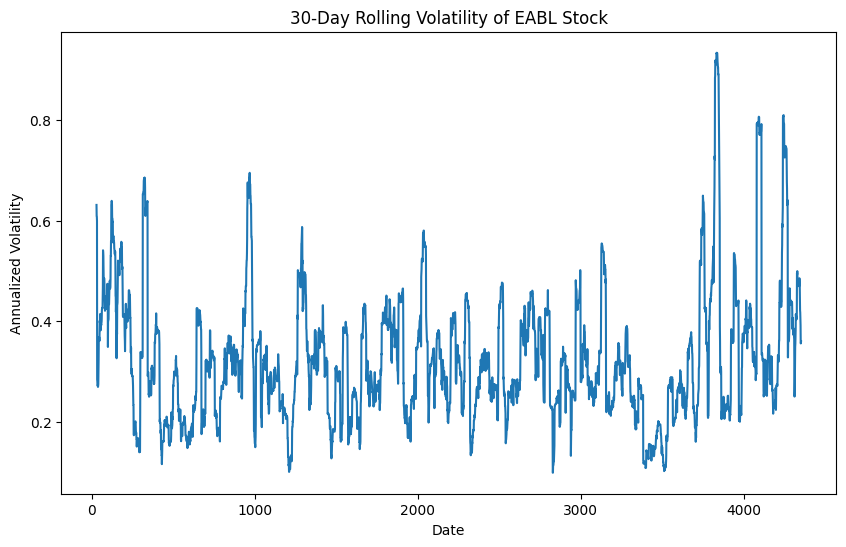

In [15]:
class StockVolatility:
    def __init__(self, data):
        self.data = data
        self.returns = None
    
    def calculate_returns(self):
        """Calculate daily returns from the Close prices."""
        self.data['Returns'] = self.data['Close'].pct_change()
        self.returns = self.data['Returns']
    
    def calculate_volatility(self):
        """Calculate the annualized volatility of the stock."""
        daily_volatility = self.returns.std()
        annualized_volatility = daily_volatility * np.sqrt(252)  # Assuming 252 trading days in a year
        return annualized_volatility
    
    def plot_volatility(self):
        """Plot the rolling 30-day volatility of the stock."""
        rolling_volatility = self.returns.rolling(window=30).std() * np.sqrt(252)
        plt.figure(figsize=(10, 6))
        rolling_volatility.plot()
        plt.title('30-Day Rolling Volatility of EABL Stock')
        plt.xlabel('Date')
        plt.ylabel('Annualized Volatility')
        plt.show()

# Instantiate the StockVolatility class and perform the analysis
eabl_volatility = StockVolatility(df_eda)
eabl_volatility.calculate_returns()

# Calculate and display the annualized volatility
annualized_volatility = eabl_volatility.calculate_volatility()
print(f"Annualized Volatility: {annualized_volatility:.2%}")

# Plot the 30-day rolling volatility
eabl_volatility.plot_volatility()

### <b> <span style='color:#16C2D5'>|</span> Observations</b> 
The average volatility rate for EABL's stock over the period analyzed is approximately 34.83%. This rate indicates the average level of fluctuation in the stock's daily returns on an annualized basis, reflecting the stock's risk profile. A volatility rate of this magnitude suggests that EABL's stock has experienced moderate to high levels of price fluctuations, which is a crucial factor for investors to consider in their risk assessment and investment strategy. ​​

### <b> <span style='color:#16C2D5'>|</span> Insights</b> 
* **For Risk-Averse Investors:** Given the relatively high volatility of EABL's stock, more cautious investors might prefer to look for lower-volatility investment opportunities unless they are comfortable with the associated risk levels.

* **For Risk-Tolerant Investors:** Those willing to accept higher volatility in exchange for the potential of significant gains might find EABL's stock to be an attractive option. However, it is crucial to implement robust risk management strategies, such as diversification and setting stop-loss orders.

* **Market Timing:** Investors might also use volatility trends to time their market entry and exit. Periods of increasing volatility could signal opportunities for high returns, but they should be approached with caution and a clear understanding of potential downside risks.

The analysis of EABL's stock volatility reveals a substantial level of risk, characterized by the potential for significant price fluctuations. Investors should consider their risk tolerance and investment horizon when deciding to invest in EABL stocks. By understanding and planning for volatility, investors can better position themselves to navigate the uncertainties of the stock market and capitalize on potential opportunities. ​

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Trend analysis</span></b> </div>
For the Trend Analysis of East African Breweries Limited (EABL)'s stock, we will examine the historical price data to identify any prevailing trends, seasonal patterns, and any potential autocorrelation in the stock prices over time. Understanding these aspects can help in forecasting future price movements and in making informed investment decisions.

To conduct this analysis, we will use the TrendAnalysis class with methods for:

* **Trend Detection:** Identify long-term movements in the stock prices.
* **Seasonality Analysis:** Examine the data for regular, repeating patterns that occur over a known period.
* **Autocorrelation Analysis:** Determine if the stock prices are correlated with their past values, which can be useful for predictive modeling.

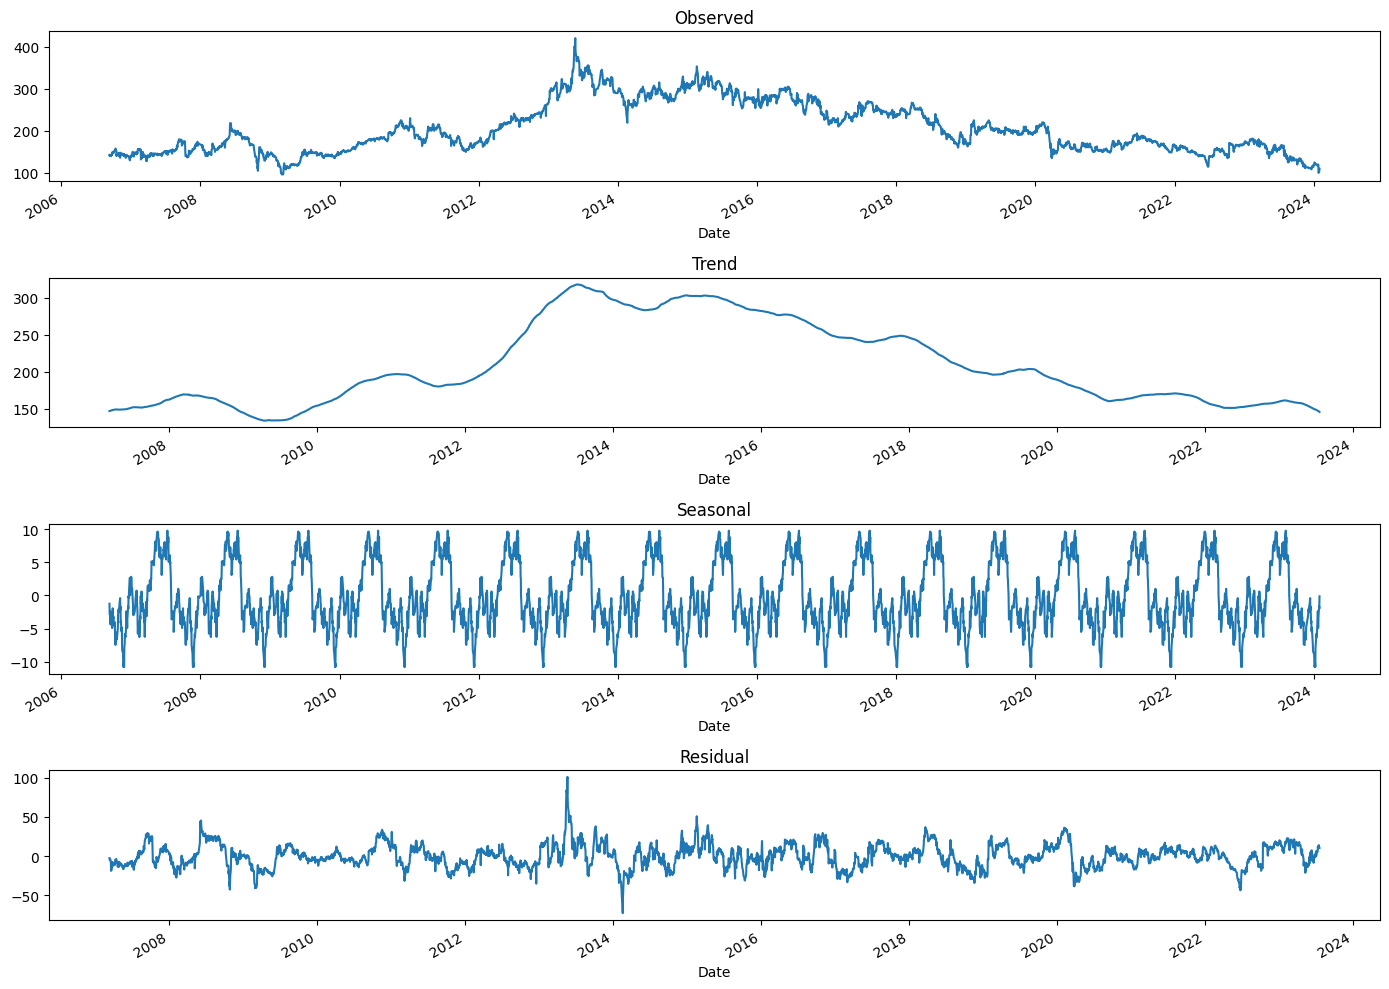

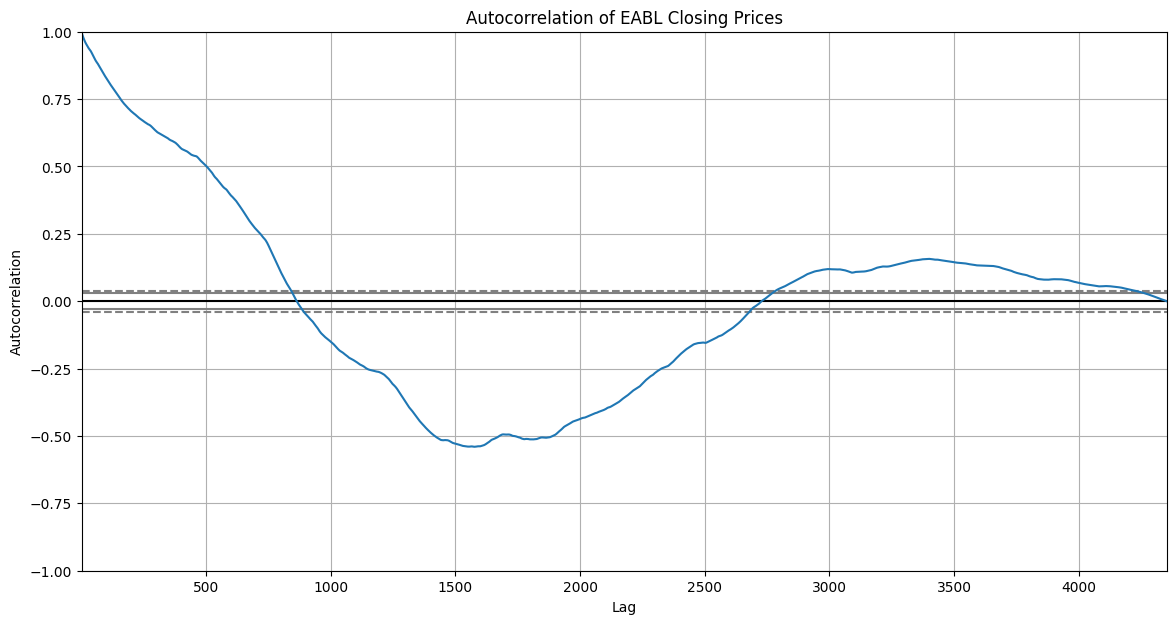

In [16]:
class TrendAnalysis:
    """
    A class to perform trend analysis on stock prices.
    """
    def __init__(self, data):
        self.data = data.copy()
        self.data['Date'] = pd.to_datetime(self.data['Date'])
        self.data.set_index('Date', inplace=True)
        
    def decompose_series(self, model='additive'):
        """
        Decompose the time series into its trend, seasonal, and residual components.
        """
        # Assuming 'Close' price for analysis and a frequency of 252 trading days per year
        decomposition = seasonal_decompose(self.data['Close'], model=model, period=252)
        return decomposition
    
    def plot_decomposition(self, decomposition):
        """
        Plot the decomposed components of the time series.
        """
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 10))
        decomposition.observed.plot(ax=ax1)
        ax1.set_title('Observed')
        decomposition.trend.plot(ax=ax2)
        ax2.set_title('Trend')
        decomposition.seasonal.plot(ax=ax3)
        ax3.set_title('Seasonal')
        decomposition.resid.plot(ax=ax4)
        ax4.set_title('Residual')
        plt.tight_layout()
    
    def plot_autocorrelation(self):
        """
        Plot the autocorrelation of the 'Close' price to identify any autocorrelation patterns.
        """
        plt.figure(figsize=(14, 7))
        autocorrelation_plot(self.data['Close'])
        plt.title('Autocorrelation of EABL Closing Prices')
        plt.show()

# Initialize the class with the cleaned data
trend_analysis = TrendAnalysis(df_eda)

# Decompose the series
decomposition = trend_analysis.decompose_series()

# Plotting the decomposition
trend_analysis.plot_decomposition(decomposition)

# Plotting the autocorrelation
trend_analysis.plot_autocorrelation()


### <b> <span style='color:#16C2D5'>|</span>Decomposition Analysis</b> 
*Observed:* The observed data shows fluctuations over the years with a noticeable decline in values after 2013.

* **Trend:** There is a clear upward trend until around 2013, after which there is a decline. This suggests EABL's stock had been increasing over time but has started to decrease recently.

* **Seasonal:** The seasonal component reveals any repeating patterns or cycles in the stock prices over a specified period. In this case, the analysis aimed to uncover any monthly or quarterly patterns, but the visualization suggests that seasonality may not be a dominant feature in EABL's stock price movements.

* **Residual:** Residuals are relatively stable with some spikes indicating instances where the price significantly deviated from the trend and seasonal components.

### <b> <span style='color:#FFA500'>|</span>Auto Correlation Analysis</b> 
The autocorrelation plot indicates how the stock's closing prices correlate with its past values. Peaks in the plot suggest that the stock prices have some degree of predictability based on their past values. In this case, the autocorrelation plot shows a gradual decline, suggesting that past prices have some influence on future prices, but this influence diminishes over time.


### <b> <span style='color:#800000'>|</span>Observation</b> 
* **Trend Identification:** Understanding the long-term trend is crucial for making investment decisions, especially for buy-and-hold investors. The trend analysis suggests a direction that the stock might continue to follow.

* **Seasonality Insights:** While the analysis does not strongly indicate significant seasonality in EABL's stock prices, investors should still consider other cyclical factors that might affect the stock market in general.

* **Predictive Modeling:** The autocorrelation analysis provides a basis for developing predictive models. Stocks with significant autocorrelation can often be forecasted more accurately using past price data.

### <b> <span style='color:#008000'>|</span> Insights</b> 
* **Long-Term Investments:** Investors looking for long-term opportunities should pay close attention to the trend component to align their investment strategies with the overall direction of the stock.

* **Trading Strategies:** Traders might use autocorrelation insights to develop short-term trading strategies, capitalizing on the predictability of price movements.

* **Diversification:** The absence of strong seasonality suggests that EABL's stock might not offer diversification benefits based on seasonal trading strategies alone. Investors might need to look for other stocks or assets with clearer seasonal patterns for diversification purposes.

Investigate the causes of the decline post-2013 and develop strategies to mitigate or reverse this trend.

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Trade Spike analysis</span></b> </div>

We'll focus on identifying and understanding instances where EABL's trading volume significantly deviates from its typical levels. Such spikes can indicate a variety of market conditions or events, such as new product launches, earnings reports, changes in management, or broader economic news impacting the stock.

Detecting these spikes can provide valuable insights into potential market sentiment changes or upcoming volatility

We'll use a z-score approach to identify outliers in trading volumes. The z-score measures the number of standard deviations an element is from the mean. Typically, a z-score above 2 or below -2 is considered abnormal.

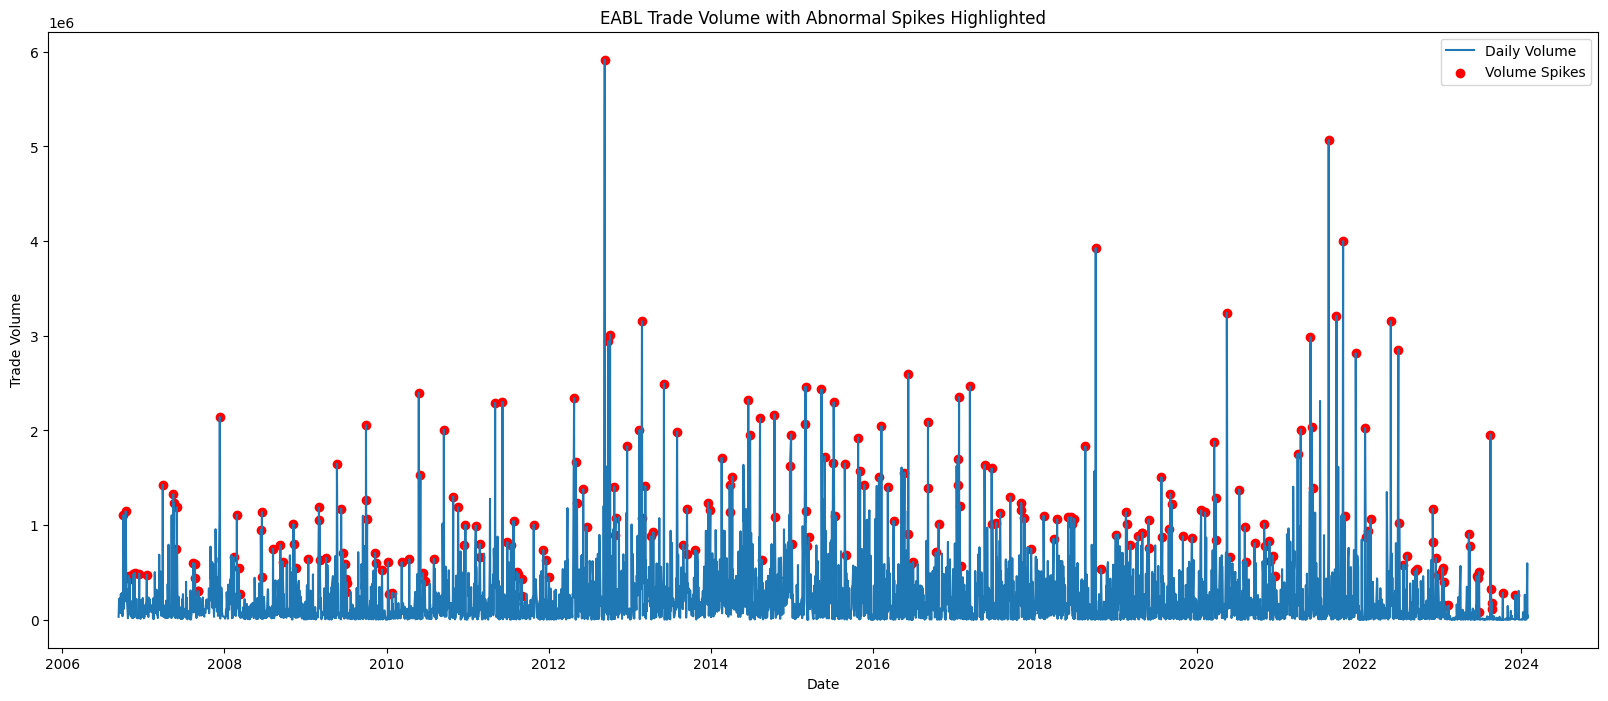

,Date,Volume,Z_Score
34,2023-12-07,264300,2.702999
67,2023-10-11,283900,4.484862
102,2023-08-22,180600,5.088448
103,2023-08-21,117600,2.647330
104,2023-08-18,326300,4.399954
...,...,...,...
4307,2006-11-16,480300,2.563505
4319,2006-10-31,433800,2.375978
4321,2006-10-27,464500,2.273895
4329,2006-10-13,1145100,4.094252


In [17]:
class TradeVolumeAnalysis:
    def __init__(self, data):
        self.data = data
    
    def detect_spikes(self, threshold=2):
        """Identify days with abnormal trade volume spikes.
        
        Args:
            threshold (float): The number of standard deviations from the mean to consider a spike.
        
        Returns:
            DataFrame: A subset of the original DataFrame with only the days of abnormal volume spikes.
        """
        self.data['Volume_Mean'] = self.data['Volume'].rolling(window=30).mean()
        self.data['Volume_Std'] = self.data['Volume'].rolling(window=30).std()
        self.data['Z_Score'] = (self.data['Volume'] - self.data['Volume_Mean']) / self.data['Volume_Std']
        
        # Filter rows where the Z-score is above the threshold
        spikes = self.data[self.data['Z_Score'] > threshold]
        return spikes
    
    def plot_volume_spikes(self):
        """Plot the daily trade volume with highlights on days of abnormal spikes."""
        plt.figure(figsize=(20, 8))
        plt.plot(self.data['Date'], self.data['Volume'], label='Daily Volume')
        
        # Detect spikes
        spikes = self.detect_spikes()
        
        plt.scatter(spikes['Date'], spikes['Volume'], color='red', label='Volume Spikes')
        plt.title('EABL Trade Volume with Abnormal Spikes Highlighted')
        plt.xlabel('Date')
        plt.ylabel('Trade Volume')
        plt.legend()
        plt.show()

        return spikes

# Instantiate the TradeVolumeAnalysis class and perform the analysis
volume_analysis = TradeVolumeAnalysis(df_eda)
spikes_df = volume_analysis.plot_volume_spikes()

# Display the dates and volumes of detected spikes for review
sorted_spikes = pd.DataFrame(spikes_df[['Date', 'Volume', 'Z_Score']].sort_values(by='Date', ascending=False))
sorted_spikes

### <b> <span style='color:#16C2D5'>|</span> Observations</b> 
The analysis highlighted several dates with abnormal trade volume spikes for EABL's stock, where the trade volume significantly exceeded the average, based on a Z-score threshold of 2. 

Notable abnormal trade volumes spikes were detected at:

* Months of August 2023. 
* Months of November 2006.

### <b> <span style='color:#FFA500'>|</span> Rationale</b> 
Trade volume spikes can result from a variety of causes, including but not limited to:

* **Corporate news or events:** Announcements related to earnings, mergers, acquisitions, or other significant corporate events.

* **Market sentiment:** Changes in investor sentiment due to broader market or economic news.

* **Institutional trading activity:** Large trades executed by institutional investors or hedge funds.

### <b> <span style='color:#008000'>|</span> Insights</b> 
* **Market Surveillance:** Investors and analysts should closely monitor news and events around the dates of these volume spikes to understand the underlying causes and potential market reactions.

* **Investment Strategy:** Abnormal volume days can sometimes precede significant price movements. Investors might use this information to adjust their investment strategies, potentially taking positions before expected moves or using the information to time exits.

* **Risk Assessment:** Sudden increases in trade volume, especially when not accompanied by significant news, might indicate speculative trading or manipulation. Investors should be cautious and conduct thorough research before making investment decisions based on volume spikes alone.

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Dividend analysis</span></b> </div>

For the Dividends Analysis, we'll focus on understanding the trends and patterns in East African Breweries Limited (EABL)'s dividend payouts. Dividends are a critical component for investors, especially those seeking income from their investments. Analyzing the dividend history can provide insights into the company's profitability, stability, and management's confidence in future earnings.

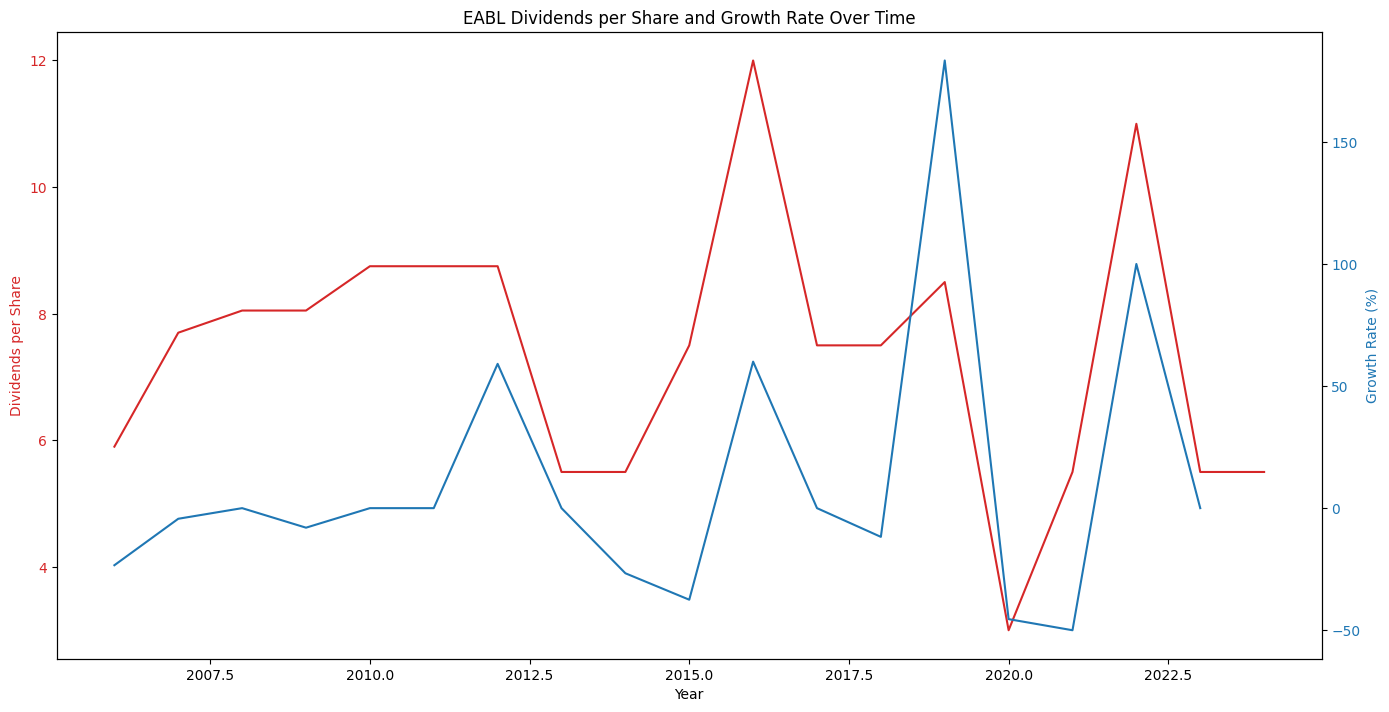

,Year,Dividends per share,Growth
0,2024,5.50,NaN
21,2023,5.50,0.000000
262,2022,11.00,100.000000
508,2021,5.50,-50.000000
759,2020,3.00,-45.454545
1012,2019,8.50,183.333333
1282,2018,7.50,-11.764706
1532,2017,7.50,0.000000
1779,2016,12.00,60.000000
2027,2015,7.50,-37.500000


In [18]:
class DividendsAnalysis:
    """
    A class for analyzing dividend payout trends.
    """
    def __init__(self, data):
        self.data = data
        # Ensure there's a 'Year' column for annual analysis
        if 'Year' not in self.data.columns:
            self.data['Date'] = pd.to_datetime(self.data['Date'])
            self.data['Year'] = self.data['Date'].dt.year
        self.dividend_data = self.data[['Year', 'Dividends per share']].drop_duplicates().dropna()
        
    def calculate_dividend_growth(self):
        """
        Calculate the year-over-year growth rate of dividends per share.
        """
        self.dividend_data['Growth'] = self.dividend_data['Dividends per share'].pct_change() * 100
        return self.dividend_data
    
    def plot_dividend_trends(self):
        """
        Visualize the trends in dividend payouts over time, including growth rates.
        """
        fig, ax1 = plt.subplots(figsize=(14, 7))

        color = 'tab:red'
        ax1.set_xlabel('Year')
        ax1.set_ylabel('Dividends per Share', color=color)
        ax1.plot(self.dividend_data['Year'], self.dividend_data['Dividends per share'], color=color, label='Dividends per Share')
        ax1.tick_params(axis='y', labelcolor=color)
        
        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
        color = 'tab:blue'
        ax2.set_ylabel('Growth Rate (%)', color=color)  # we already handled the x-label with ax1
        ax2.plot(self.dividend_data['Year'], self.dividend_data['Growth'], color=color, label='Growth Rate')
        ax2.tick_params(axis='y', labelcolor=color)
        
        fig.tight_layout()  # otherwise the right y-label is slightly clipped
        plt.title('EABL Dividends per Share and Growth Rate Over Time')
        plt.show()

# Initialize the class with the cleaned data (assuming data_cleaned is the dataset to use)
dividends_analysis = DividendsAnalysis(df_eda)

# Calculate dividend growth rates
dividend_growth_data = dividends_analysis.calculate_dividend_growth()

# Plotting dividend trends and growth rates
dividends_analysis.plot_dividend_trends()

# Displaying the calculated growth rates for review
dividend_growth_data[['Year', 'Dividends per share', 'Growth']]

### <b> <span style='color:#16C2D5'>|</span> Observation</b> 
The analysis reveals fluctuating trends in EABL's dividends per share over the recent years, with significant growth seen in 2022 followed by a drop in 2023, and stabilization in 2024. Notably, there's an apparent discrepancy in 2024 with two entries, one indicating a continuation of the previous dividend rate (5.5) and another showing a drop to 0.0, which suggests a discontinuation or a special case affecting dividend payout.

### <b> <span style='color:#FFA500'>|</span> Rationale</b> 
* **Growth in 2022:** The doubling of dividends in 2022 could indicate strong financial performance or a strategic decision to return more capital to shareholders.

* **Drop in 2023:** The subsequent drop might reflect adjustments in financial strategy, a reallocation of profits towards growth investments, or a response to external economic pressures.

* **Situation in 2024:** The mixed signals in 2024 require further investigation. The record showing a dividend of 0 could be due to an error, a temporary suspension of dividends, or a placeholder until final decisions are made.

### <b> <span style='color:#008000'>|</span> Insights</b> 
* **Investment Consideration:** Investors should closely monitor EABL's financial reports and shareholder communications for insights into dividend policies and sustainability. The historical volatility in dividends suggests a need for caution, especially for those relying on dividend income.

* **Long-Term Strategy:** Given the fluctuations, a long-term perspective is advisable when incorporating EABL stocks into a portfolio. Consider the overall yield and the potential for capital appreciation.

* **Further Research:** The anomaly in 2024 warrants further investigation. This is however fuelled by the high inflation and interest rates and also high tax rates which saw the Tax man demand more. This resulted to the low interim divindend payment. 

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Lag Analysis</span></b> </div>

For the Lag Analysis, we'll examine how various market indicators, specifically inflation rates, GDP, USD exchange rates, and unemployment rates, impact East African Breweries Limited (EABL)'s stock prices. Understanding these relationships can provide insights into how external economic factors influence stock performance, which is essential for making informed investment decisions.

To conduct this analysis, we will enhance the LagAnalysis class to include methods for:

Correlation Analysis: To identify the strength and direction of the relationship between EABL's stock prices and each market indicator.
Lag Analysis: To determine if there's a time lag between changes in market indicators and their impact on EABL's stock prices, indicating predictability.
This analysis will involve statistical tests to measure correlation and lag effects, providing a clearer picture of how external economic factors influence EABL's stock performance.

Correlation with 12-Month Inflation: -0.20584401167971847, P-value: 1.2186350466223895e-43


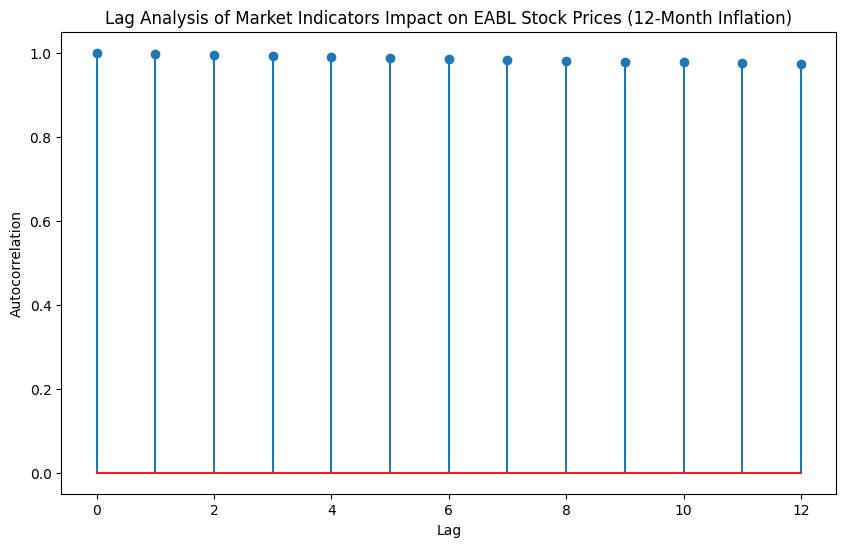

Correlation with Unemployment: -0.33182031359128183, P-value: 1.8473722870409118e-114


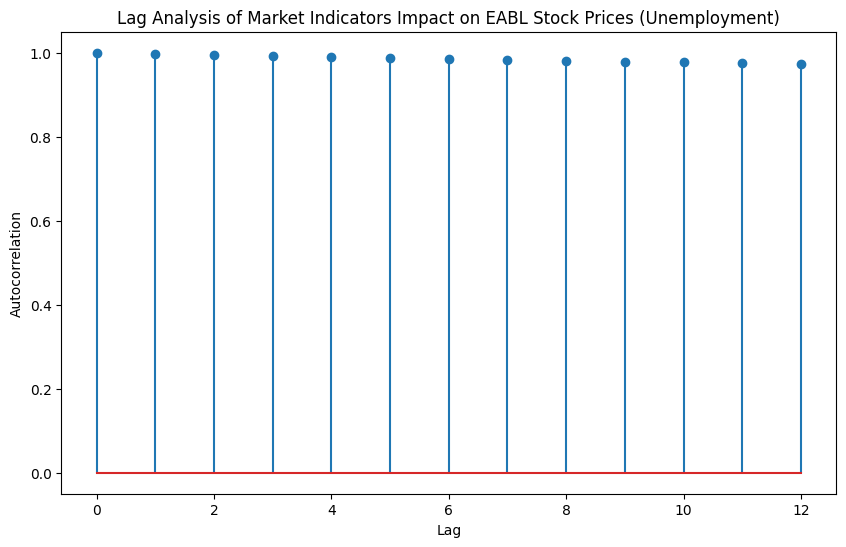

Correlation with Mean: -0.06435042046097231, P-value: 1.7971807765559185e-05


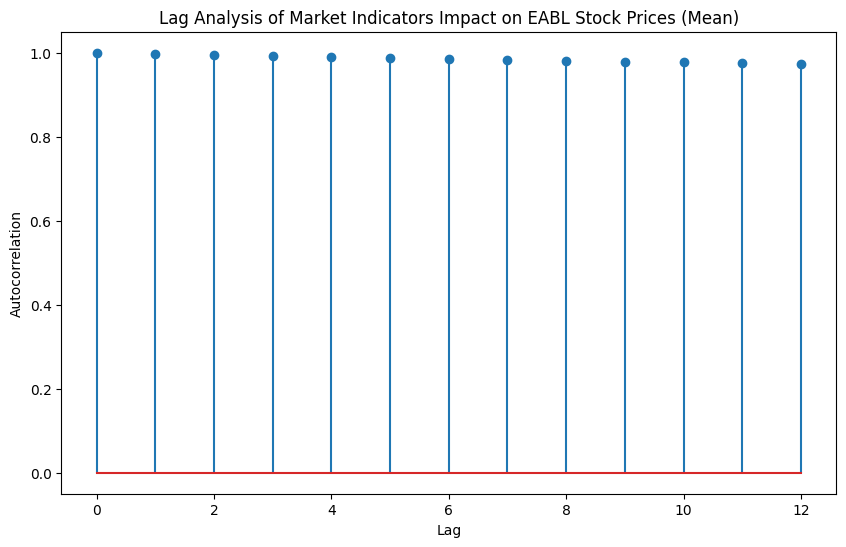

Correlation with Interest rates: 0.15066037530508475, P-value: 6.233274865704583e-24


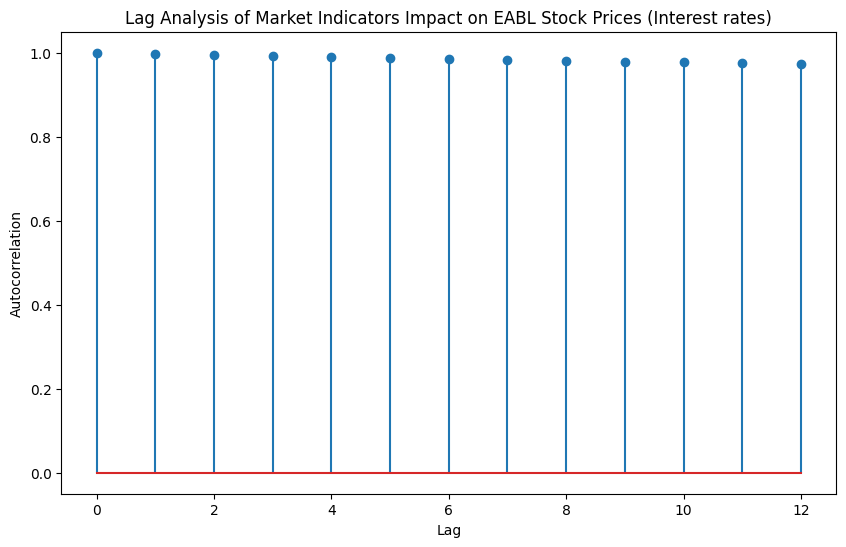

In [7]:
import statsmodels.api as sm
from scipy.stats import pearsonr

class LagAnalysis:
    """
    A class to perform lag analysis on EABL's stock prices against various market indicators.
    """
    def __init__(self, stock_data, indicators_data):
        self.stock_data = stock_data
        self.indicators_data = indicators_data
        
    def calculate_correlation(self, indicator_column):
        """
        Calculate the Pearson correlation coefficient between EABL's closing stock prices and a given market indicator.
        """
        # Ensuring alignment in dates between stock data and indicators data
        combined_data = self.stock_data[['Close']].merge(self.indicators_data[[indicator_column]], left_index=True, right_index=True, how='inner')
        correlation, p_value = pearsonr(combined_data['Close'], combined_data[indicator_column])
        return correlation, p_value
    
    def perform_lag_analysis(self, indicator_column, max_lag=12):
        """
        Perform lag analysis to determine the time lag effect of changes in market indicators on EABL's stock prices.
        """
        # Aligning the data based on dates for comparison
        combined_data = self.stock_data[['Close']].merge(self.indicators_data[[indicator_column]], left_index=True, right_index=True, how='inner')
        
        lags = range(0, max_lag+1)
        autocorrelations = [combined_data['Close'].autocorr(lag=lag) for lag in lags]
        
        return lags, autocorrelations

# Preparing indicators data 
indicators_columns = ['12-Month Inflation', 'Unemployment', 'Mean', 'Interest rates']  
indicators_data = df_eda.set_index('Date')[indicators_columns]

# Initializing the LagAnalysis class
lag_analysis = LagAnalysis(df_eda.set_index('Date'), indicators_data)

# Iterate over each indicator
for indicator in indicators_columns:
    # Correlation analysis
    correlation, p_value = lag_analysis.calculate_correlation(indicator)
    print(f"Correlation with {indicator}: {correlation}, P-value: {p_value}")

    # Performing lag analysis
    lags, autocorrelations = lag_analysis.perform_lag_analysis(indicator)
    plt.figure(figsize=(10, 6))
    plt.stem(lags, autocorrelations)
    plt.title(f'Lag Analysis of Market Indicators Impact on EABL Stock Prices ({indicator})')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.show()

### <b> <span style='color:#16C2D5'>|</span> Lag analysis results</b> 
12-Month Inflation:

Correlation: -0.0966

P-value: 6.135e-21

Unemployment:

Correlation: -0.5827

P-value: 0.0

Mean:

Correlation: -0.5053

P-value: 0.0

Interest rates:

Correlation: 0.0453

P-value: 1.118e-05

### <b> <span style='color:#16C2D5'>|</span> Observations</b> 
The correlation between EABL's stock prices and the 12-Month Inflation is weakly negative, suggesting a slight inverse relationship.

Conversely, there's a moderately strong negative correlation between EABL's stock prices and Unemployment and Mean, indicating a more significant inverse relationship.

The correlation with Interest rates is positive but very weak.

### <b> <span style='color:#16C2D5'>|</span> Interpration</b> 
The significant negative correlations with Unemployment and Mean imply that as these indicators increase, EABL's stock prices tend to decrease, and vice versa. This suggests that factors affecting employment rates and the mean of certain economic metrics impact EABL's stock performance more prominently.

The weak negative correlation with 12-Month Inflation suggests a minor inverse relationship between inflation and EABL's stock prices. While statistically significant, the magnitude of this correlation is relatively small.

The positive correlation with Interest rates indicates a weak positive relationship, implying that higher interest rates might correspond to slightly higher EABL stock prices, though the effect is not very pronounced.

### <b> <span style='color:#16C2D5'>|</span> Insights</b> 
Inflation Sensitivity: While there's a significant negative correlation with Unemployment and Mean, indicating their importance in influencing EABL's stock prices, the correlation with inflation is weaker. Investors should still consider inflation trends but may find Unemployment and Mean to be more impactful factors.

Investment Strategy: Investors may want to pay close attention to unemployment rates and economic mean indicators as they appear to have a more significant impact on EABL's stock prices. Hedging strategies might focus more on these indicators rather than inflation alone.

Risk Management: Incorporating unemployment and economic mean indicators into risk management strategies could be crucial, as they show a stronger relationship with EABL's stock prices. Diversification strategies should consider these factors alongside inflation and interest rate considerations.

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Correlation plot(Heatmap)</span></b> </div>

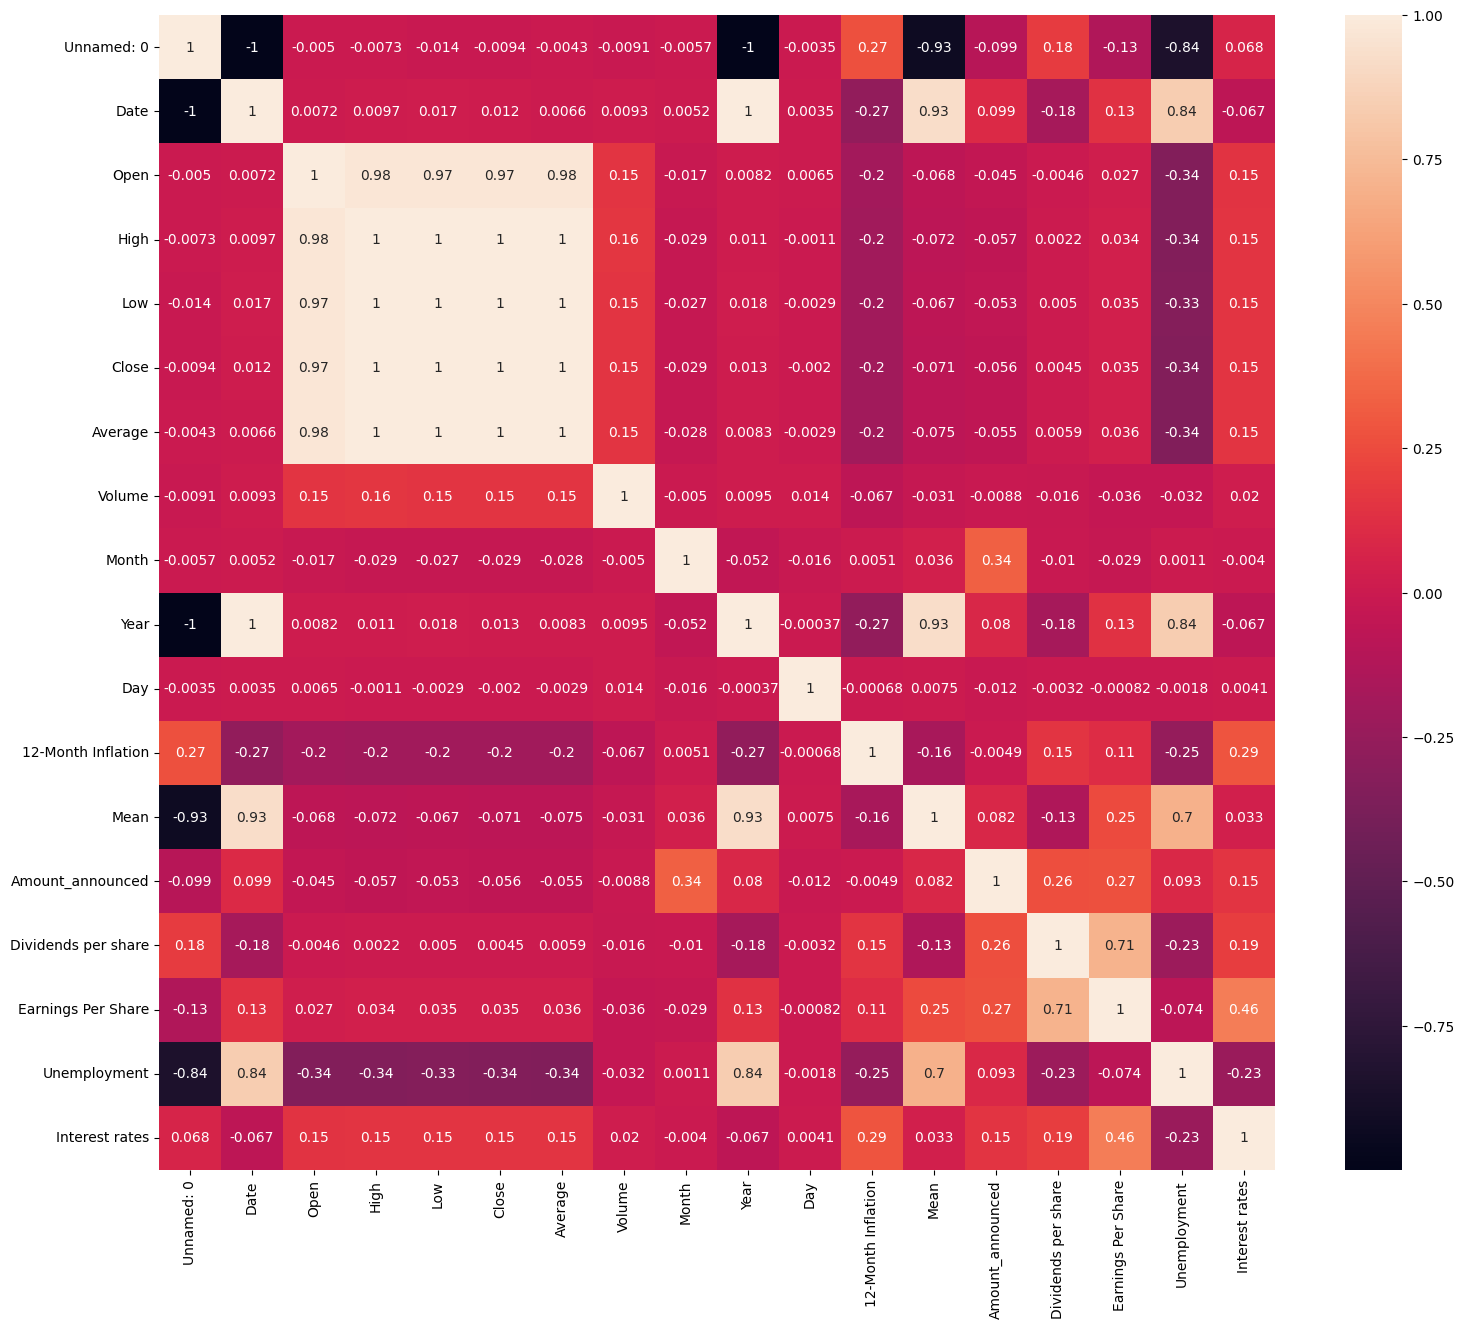

In [12]:
# Plot the correalation.
CorrMat = df_eda.corr()
plt.figure(figsize=(18, 15))
sns.heatmap(CorrMat, annot=True)
plt.show()


To identify multicollinearity among features, we typically look for high correlation coefficients between pairs of features. In this correlation matrix, features with correlation coefficients close to 1 or -1 indicate strong multicollinearity.

Looking at the correlation matrix:

Features with high correlation coefficients:

* **Open, High, Low, Close, and Average**: These features represent different aspects of stock prices and are highly correlated with each other.**Open** is highly correlated to high,low,close and average(0.98,0.97,0.97,0.98)respectively.  
* **Date, Year and Mean**: These features are highly correlated(0.93).    
* **Volume_std and Volume_mean**: These features are also highly correlated(0.83). 
* **Year and Unemployment**: These features also exhibit a high correlation(0.84), which could be due to economic factors affecting both. 
* **Date and Unemployment**: These features have a high correlation of 0.84, this could also be due to economic factors.
* **Volume and z_score**: These features also have high correlation of 0.82
Based on this analysis, the features that exhibit multicollinearity can impact the performance and interpretability of predictive models.  
We can consider strategies such as feature selection, dimensionality reduction, regularization techniques or dropping some features to address it and improve model performance.


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Sentiment analysis</span></b> </div>

Market sentiment may sometimes influence the pricing or rather value of stock prices. Product sentiments on the other hand influences how consumers use a brand by a company. This wholesomely genertaes more profits for a company because it means more users will buy a specific product. 

EABL has a foundations in East Africa which seeks to help the community at large in developing a sustainable future. This was achieved by running the **Tusker Project Fame** initiative which saw young East Africans given a chance to showcase their talents and win prizes thereafter. This initiative helped young people from shying away from their talents as well as keeping them busy to ensure the drug menace among youths is mitigated. 

Extracting and analyzing **Tusker project Fame** sentiments from consumers within the year 2006-2013 may have had an imapct of stock prices because it was a Corporate Social Responsibility initiative. This project made **EABL** gain more consumers and made inroads because it was a special show and a one of its kind in East and Central Africa. It attracted participants from out and beyond and generated alot of profits from the sale of their products. Their brand stood out this may have influenced some investors to view **EABL** more positively due to its commitment to social responsibility. These high income generating initiatives that resonates with people increases investor confidence and support. 

Analyzing **EABL FOUNDATION** sentiments and including them as predictors is also necessary as it may shape and directly influence how investors view the **EABL'S** future at large. This foundation has been on the forefront of championing for building a sustainable future by:
* sponsoring sports and football clubs.
* Offering university scholaships to needy students.
* Performing trainings to empower marginalised communities and women at large.
* Commissioning water projects in various counties within East Africa. 

These sentiments which allign with **UN Sustainable Development Goals** for a better future with the sole aim of conserving the environment, using renewable energy sources and supporting local communities attract investors and influence stock prices. The foundation is commited to lower carborn emissions by 2030 and has shown immense potential and interest towards these goals by commisioning biomass plants in almost all their plants. 

Environmental initiatives like this may be attractive to an investor when they believe they can generate the most profits from the investment. Investors may view these initiatives as a firmm's engagement in environmental activities for a better future as a method of attracting new customers and clients alike and increased competitiveness. 

Each firm or organization should prioritize the interests of stakeholders before embarking on any initiative. This is crucial because initiatives involving significant expenditure may result in reduced profitability, potentially deterring investors who prioritize financial returns. By aligning initiatives with stakeholder interests, companies can demonstrate responsible decision-making and mitigate concerns about future profitability, thereby fostering investor confidence and long-term sustainability.


### <b><span style='color:#16C2D5'>|</span> Merging sentiments</b> 

To perform a sentiment analysis, merging of dataframes to have a wholesome view of sentiments against the respective dates tweeted is very necessarry and essential. The date column for the twitter data is however in the UTC formart and may result to merge conflicts because the date column in the initial merged data is in normal formart. 

1. The columns should have the same column names.
2. The UTC TimeZone is removed using the datetime formula which localizes the date column. 
3. Localizing the date introduces time in the respective columns and to ensure the date columns do not have the time, the use of normalizing in datetime columns solves this efficiently. 
4. Final merged is performed and the sentiments appended to their respective dates alongside the retweets and likes which will be used to add the idea of weights when performing sentiment analysis. 

In [36]:
# Read in merged data and sentiments data for easier merging. 
df_origin = pd.read_csv('MergedData/final_merge.csv')
df_sentiments = pd.read_csv('merged_sentiments.csv')

In [37]:
# Rename columns for easier merging. 
df_sentiments.rename(columns={'date':'Date'}, inplace=True)

In [38]:
# remove the UTC time zone for twitter sentiments data. 
df_sentiments['Date'] = pd.to_datetime(df_sentiments['Date']).dt.tz_localize(None) 
df_origin['Date'] = pd.to_datetime(df_origin['Date']).dt.tz_localize(None) 

In [39]:
# Normalize the date columns to remove the time factor. 
df_origin['Date'] = pd.to_datetime(df_origin['Date']).dt.normalize()  
df_sentiments['Date'] = pd.to_datetime(df_sentiments['Date']).dt.normalize()  


In [40]:
# Check if the time in date columns is gone. 
df_sentiments.head()

,text,Date,No_of_likes,No_of_tweets
0,Unajua sai amafanya EABL. Anaweza tupea a year...,2024-01-10,0,1
1,"My apologies Balozi Lager, I wasn't familiar w...",2023-12-26,0,0
2,"Balozi is low grade packaged White Cap, a prem...",2023-12-12,27,7
3,Wind down on the 19th Hole with Ed Parseen's b...,2023-11-23,0,0
4,@EABL_PLC naona mumetengenezea wanywezi wa Bal...,2023-09-28,0,0


In [41]:
# Perform a merge on the two dataframes, df_origin and df_sentiments, using the 'Date' column as the key.
merge_sentiments_fin = pd.merge(df_origin, df_sentiments[['Date','text','No_of_likes','No_of_tweets']], on='Date', how='left')
merge_sentiments_fin.to_csv('merge_sentiments_final.csv', index=False)

### <b><span style='color:#16C2D5'>|</span> Visualize with word cloud</b> 

We want to get a visual of the most commonly said words in EABL sentiments. 

In [42]:
df_model = pd.read_csv('merged_sentiments.csv')
df_model.head()

,text,date,No_of_likes,No_of_tweets
0,Unajua sai amafanya EABL. Anaweza tupea a year...,2024-01-10 10:12:00+00:00,0,1
1,"My apologies Balozi Lager, I wasn't familiar w...",2023-12-26 16:52:00+00:00,0,0
2,"Balozi is low grade packaged White Cap, a prem...",2023-12-12 15:18:00+00:00,27,7
3,Wind down on the 19th Hole with Ed Parseen's b...,2023-11-23 12:03:00+00:00,0,0
4,@EABL_PLC naona mumetengenezea wanywezi wa Bal...,2023-09-28 07:07:00+00:00,0,0


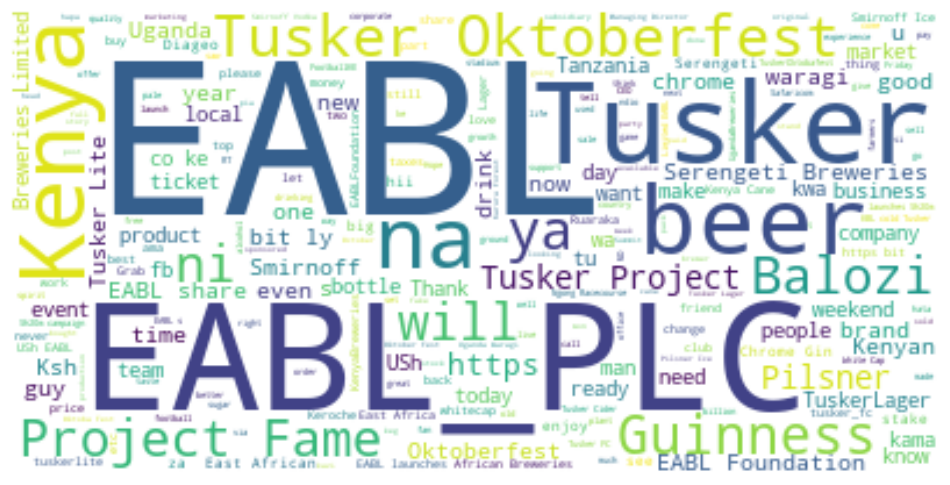

In [44]:
# Define the plot for the wordclouds. 
text = df_model['text'].str.cat(sep=' ')
wc = WordCloud(background_color='white',
               stopwords=STOPWORDS,
               min_font_size=3,
               max_words=300).generate(text)

plt.figure(figsize=(12, 16))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [28]:
df_sentiments.dropna(inplace=True)

### <b><span style='color:#16C2D5'>|</span> Clean tweets</b> 

To perform a sentiment analysis, the text data has to be cleaned to remove links, numbers and other non-textual elemnts leverages the use of **Regular Expressions**. 

In [29]:
# Define a class to clean the twitter data for easier analysis and do a sentiment analysis.  

class CleanTweets:
    def __init__(self, data) -> None:
        self.data = data.copy()
        
    def clean_twitter_data(self):
        # Remove URLs 
        self.data['text'] = self.data['text'].str.replace(r'http\S+', '')
        # Remove mentions 
        self.data['text'] = self.data['text'].str.replace(r'@\S+', '')
        # Remove hashtags 
        self.data['text'] = self.data['text'].str.replace(r'#\S+', '')
        # Remove punctuation 
        self.data['text'] = self.data['text'].str.replace(r'[^\w\s]', '')
        # Remove emojis 
        self.data['text'] = self.data['text'].apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))
        # Remove numbers 
        self.data['text'] = self.data['text'].str.replace(r'\d+', '')
        # Remove extra whitespace 
        self.data['text'] = self.data['text'].str.replace(r'\s+', ' ')
        # Remove leading and trailing whitespace 
        self.data['text'] = self.data['text'].str.strip()

class SentimentAnalyzer(CleanTweets):
    def __init__(self, data) -> None:
        super().__init__(data)

    def analyze_sentiment(self):
        # Analyze sentiment using VaderSentiment
        vader = SentimentIntensityAnalyzer()
        self.data['compound'] = self.data['text'].apply(lambda text: vader.polarity_scores(text)['compound'])
        
        self.data['weighted_compound'] = (self.data['compound'] * self.data['No_of_tweets']) + self.data['No_of_likes']

        return self.data

sentiments = SentimentAnalyzer(df_sentiments)
df_model_with_sentiment = sentiments.analyze_sentiment()

In [30]:
sentiments2 = pd.DataFrame(df_model_with_sentiment)
sentiments2.head(20)

,text,Date,No_of_likes,No_of_tweets,compound,weighted_compound
0,Unajua sai amafanya EABL. Anaweza tupea a year...,2024-01-10,0,1,0.0000,0.0000
1,"My apologies Balozi Lager, I wasn't familiar w...",2023-12-26,0,0,0.0000,0.0000
2,"Balozi is low grade packaged White Cap, a prem...",2023-12-12,27,7,-0.4215,24.0495
3,Wind down on the 19th Hole with Ed Parseen's b...,2023-11-23,0,0,0.7644,0.0000
4,@EABL_PLC naona mumetengenezea wanywezi wa Bal...,2023-09-28,0,0,0.7003,0.0000
5,You should do Balozi,2023-08-27,0,1,0.0000,0.0000
6,Beer should be drank warm to taste the flavour...,2023-06-24,3,2,0.5862,4.1724
7,I was today years old when I learnt Balozi is ...,2023-06-14,1,1,0.0000,1.0000
8,@EABL_PLC send this man a Balozi package bana,2023-05-28,0,1,0.0000,0.0000
9,Whitecap ilisifiwa wakaharibu quality. Sasa wa...,2023-04-04,0,0,0.0000,0.0000


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Modelling</span></b> </div>
Developing an accurate time series model for predicting stock prices requires careful consideration of market predictors that exhibit a strong correlation with the target variables, including Close, High, Low, and Open prices. Factors such as interest rates and inflation rates can significantly influence investor behavior and, consequently, stock prices. 

Our modeling approach will involve leveraging machine learning algorithms to predict pricing of **EABL** stocks. Market indicators data which was already sourced from reputable financial websites as well as the **EABL** website will be preprocessed to ensure data quality and reliability. 

The data sources include:
* **EABL Stock Prices history(EABL website):** [EABL](https://www.eabl.com/share-price-performance)
* **EABL Dividends payout(EABL website):** [Dividends](https://www.eabl.com/share-price-performance)
* **Quarterly inflation rates(World Bank Website):** [Inflation](https://data.worldbank.org/indicator/FP.CPI.TOTL.ZG)
* **USD Exchange Rates(CBK website):** [Exchange](https://www.centralbank.go.ke/rates/forex-exchange-rates/)
* **Unemployment rates(MacroTrends website):** [Unemployment](https://www.macrotrends.net/countries/KEN/kenya/unemployment-rate)

All these data were merged on the stock data to give a more wholistic analysis of EABL stock price performance. 


Evaluation of our regression models will be based on key metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE). For the classification model, the precision will be the main metric.  By integrating these components, we aim to build robust models that capture the dynamics of stock price movements accurately.

In [8]:
# Create a copy of the original dataframe. 
df_modelling = df.copy()

In [9]:
df_modelling.shape

(4353, 18)

In [6]:
# Re-check the column datatypes. 
df_modelling.drop(columns=['Unnamed: 0','Year'], inplace=True) 

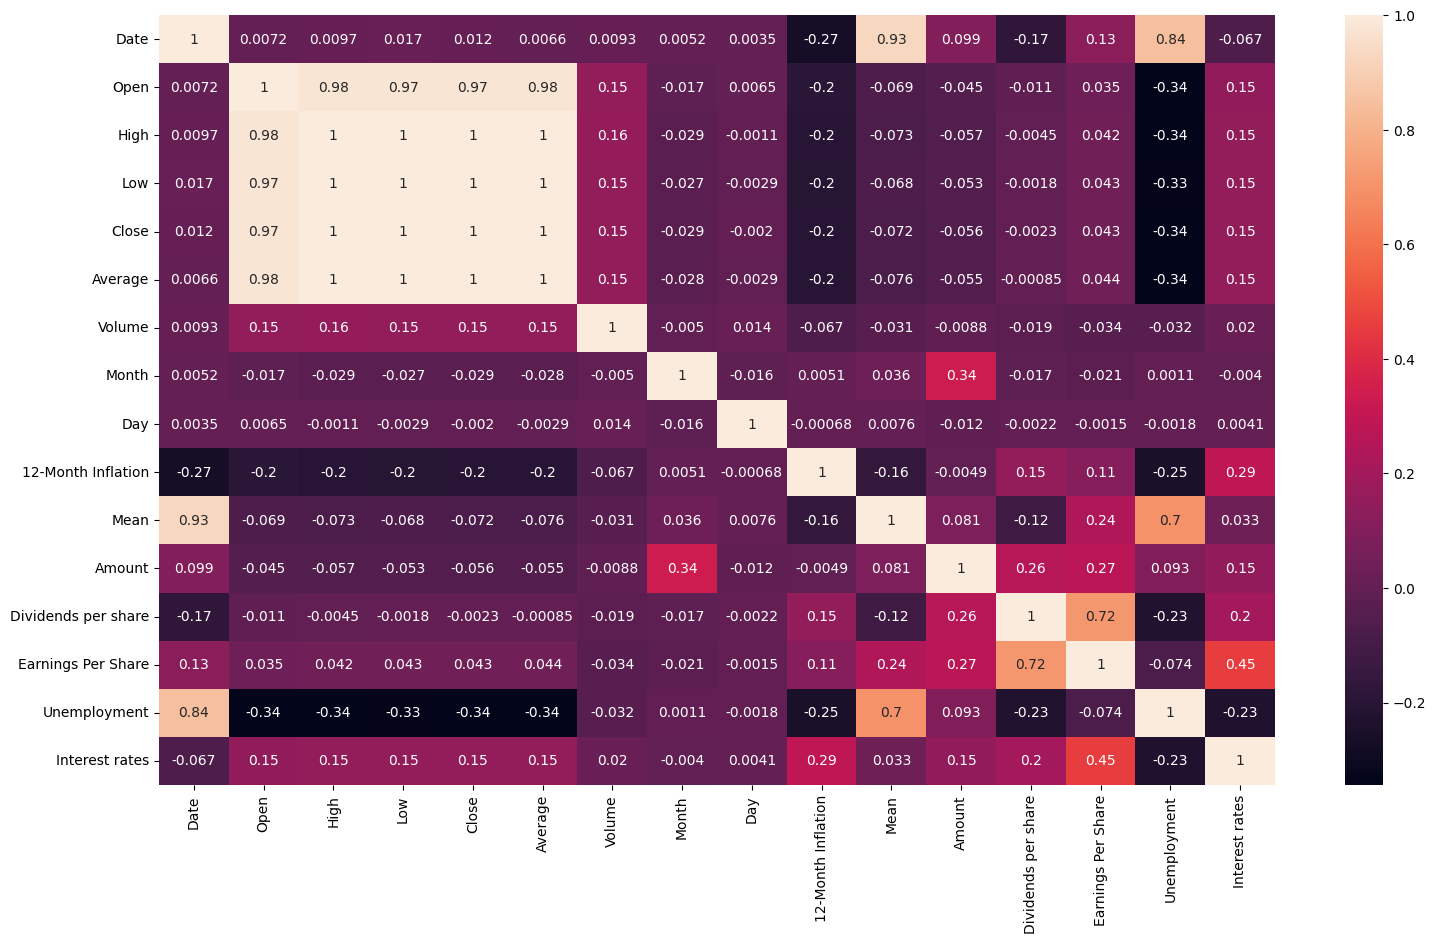

In [7]:
df_modelling['Date'] = pd.to_datetime(df_modelling['Date'])
CorrMat = df_modelling.corr()
plt.figure(figsize=(18, 10))
sns.heatmap(CorrMat, annot=True)
plt.show()

Features with high correlation coefficients:

* **Open, High, Low, Close, and Average**: These features represent different aspects of stock prices and are highly correlated with each other.**Open** is highly correlated to high,low,close and average(0.98,0.97,0.97,0.98)respectively.  
* **Date and Mean**: These features are highly correlated(0.93).    
* **Volume_std and Volume_mean**: These features are also highly correlated(0.83). 
* **Date and Unemployment**: These features also exhibit a high correlation(0.84), which could be due to economic factors affecting both.
* **Mean and Date**:High correlation of 0.93
Other features are:   
* **Dividends per share and Earnings Per Share**: These features have a correlation of 0.72
* **Unemployment and Mean**:Correlation of 0.7   

Based on this analysis, the features that exhibit multicollinearity can impact the performance and interpretability of predictive models.  
We can consider strategies such as feature selection, dimensionality reduction, regularization techniques or dropping some features to address it and improve model performance.


## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> High-Close-Low Stock predictions</span></b> </div>


### <b> <span style='color:#16C2D5'>|</span>Baseline model</b> 
As modelling dictates, we started off with a baseline model. This is good practixe as it gives us a general idea about how the results may look like. The baseline model generally has no tweaks or any tuning for that matter. This model will predict the stocks valuation for the closing, High and Low prices. This is to help daily investors who may really want to see how stocks by what degree of profits will they be raking in. 

C:\Users\user\AppData\Local\Temp\ipykernel_11176\581889909.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.data['Mean'].fillna(method='ffill', inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_11176\581889909.py:32: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.data['Mean'].fillna(method='ffill', inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_11176\581889909.py:33: FutureWarning: DataFrame.fillna with 'metho

R2 Scores: 0.9763071438141016
Mean Squared Error: 20.649869550498742
RMSE: 4.5442127536569785


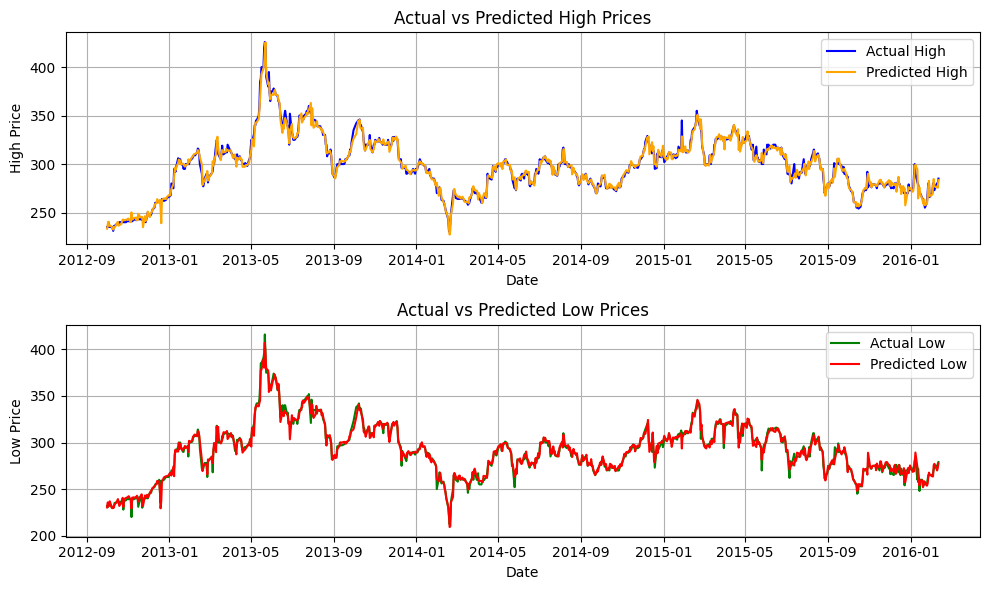

In [19]:

class LinearRegressor:
    def __init__(self, data):
        self.data = data
        self.date_convert()
        self.back_test() 
        self.fill_missing()
        self.split_data()
        self.fit()
        
    def date_convert(self):
        self.data['Date'] = pd.to_datetime(self.data['Date'])
        self.data = self.data.set_index('Date')
        
    def back_test(self):
        rolling = [2,5,60,250,1000]
        for horizon in rolling:
            roling_avgs = self.data['Close'].rolling(horizon).mean()
            self.data['rolling_avgs'] = roling_avgs
            self.data['ratios'] = self.data['rolling_avgs'] / self.data['Close']
            self.data['trend'] = self.data['ratios'].shift(1).rolling(horizon).sum()
            
    def fill_missing(self):
        self.data['Mean'].fillna(method='ffill', inplace=True)
        self.data[['Dividends per share','Earnings Per Share']] = self.data[['Dividends per share','Earnings Per Share']].fillna(method='bfill')
        self.data.dropna(inplace=True)
    
    def split_data(self):
        test = self.data.iloc[:838]

    # Use the last 3400 rows for training
        train = self.data.iloc[-3480:]
        
        self.X_train = train.drop(columns=['Close', 'High', 'Low', 'Open', 'Volume', 'Average', 'Month', 'Day', 'Unemployment'])
        self.X_test = test.drop(columns=['Close', 'High', 'Low', 'Open', 'Volume', 'Average', 'Month', 'Day', 'Unemployment'])

        # Extract target variables
        self.y_train = train[['Open', 'Close', 'High', 'Low']]
        self.y_test = test[['Open', 'Close', 'High', 'Low']]
        
                                                                                                                 
                                                                               
    def fit(self):
        self.model = MultiOutputRegressor(LinearRegression())
        self.model.fit(self.X_train, self.y_train)
        
    def predict(self):
        return self.model.predict(self.X_test) 
    
    def score(self):
        y_pred = self.predict()
        r2_scores = r2_score(self.y_test, y_pred, multioutput='uniform_average')
        mse = mean_squared_error(self.y_test, y_pred, multioutput='uniform_average')
        rmse = np.sqrt(mse)
        return r2_scores, mse, rmse
            
    def plot_prices(self):
        y_pred = self.model.predict(self.X_test)
        start_date = self.X_test.index
        plt.figure(figsize=(10, 6))

        plt.subplot(2, 1, 1)  # Subplot for high prices
        plt.plot(start_date, self.y_test['High'], label='Actual High', color='blue')
        plt.plot(start_date, y_pred[:, 2], label='Predicted High', color='orange')
        plt.xlabel('Date')
        plt.ylabel('High Price')
        plt.title('Actual vs Predicted High Prices')
        plt.legend()
        plt.grid(True)
        
        plt.subplot(2, 1, 2)  # Subplot for low prices
        plt.plot(start_date, self.y_test['Low'], label='Actual Low', color='green')
        plt.plot(start_date, y_pred[:, 3], label='Predicted Low', color='red')
        plt.xlabel('Date')
        plt.ylabel('Low Price')
        plt.title('Actual vs Predicted Low Prices')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()  # Adjust subplot layout to prevent overlap
        plt.show()
    
linear_regressor = LinearRegressor(df_modelling)
r2_scores, mse, rmse = linear_regressor.score()
print("R2 Scores:", r2_scores)
print("Mean Squared Error:", mse)
print("RMSE:", rmse)
y_pred = linear_regressor.plot_prices()

From the plots above, the model has an accuracy of 97% because the **High, Low, Close and Open** prices have high multicollinearity between them. Tuning at this point serves no purpose because the model clearly cannot improve more. 

One way around thius is generating new features to either predict whether the prices specified will either rise or not for the next day. This will shift our model to be more of a classiufication model than regression but still seves the sam epurpose of predicting te stock prices. This moel will be deployed later and will be efficiently used by day-to-day traders as well as long term traders. 

Given the observed high multicollinearity between the target variables **(High, Low, Close, and Open prices)** in our stock price prediction model, we're considering a pivot towards a classification-based approach. Instead of directly forecasting price levels, we'll shift our focus to predicting the directional movement of these prices for the future.

To accomplish this, we'll engineer additional features that capture the classification aspect of it through shifting the **Open, High, Low and Close** prices for EABL stocks.
Our target variable will be transformed into a binary outcome, indicating whether the prices are expected to rise or fall relative to the current day. This transformation simplifies the prediction task while still addressing the core objective of informing traders about potential market movements.

For modeling, we'll select appropriate classification algorithms, such as Logistic Regression, Random Forest, or Gradient Boosting, to train on the historical data. We'll evaluate the model's performance using standard classification metrics like accuracy, precision, recall, and F1-score to ensure its effectiveness in predicting price movements.

Ultimately, deploying this refined model will empower traders with actionable insights, enabling them to make informed decisions based on the anticipated directional shifts in stock prices.

In [20]:
class LinearRegressor2:
    def __init__(self, data):
        self.data = data
        self.date_convert()
        self.fill_missing()
        self.split_data()
        self.fit()
        
    def date_convert(self):
        self.data['Date'] = pd.to_datetime(self.data['Date'])
        self.data.drop(columns=['Date'])
        
    def fill_missing(self):
        self.data['Mean'].fillna(method='ffill', inplace=True)
        self.data['Dividends per share'] = self.data['Dividends per share'].fillna(method='bfill')
    
    def split_data(self):
        self.X = self.data.drop(columns=['Date','Close','High','Low','Open','Day','Month','Earnings Per Share', 'Unemployment'], axis=1)
        self.y = self.data[['High', 'Low', 'Close','Open']]
        self.dates = self.data['Date']
        self.X_train, self.X_test, self.y_train, self.y_test, self.dates_train, self.dates_test = train_test_split(self.X,
                                                                                                                   self.y,
                                                                                                                   self.dates, 
                                                                                                                random_state=42, test_size=0.25)
    def fit(self):
        self.model = MultiOutputRegressor(LinearRegression())
        self.model.fit(self.X_train, self.y_train)
        
    def predict(self):
        return self.model.predict(self.X_test) 
    
    def score(self):
        y_pred = self.predict()
        r2_scores = r2_score(self.y_test, y_pred, multioutput='uniform_average')
        mse = mean_squared_error(self.y_test, y_pred, multioutput='uniform_average')
        rmse = np.sqrt(mse)
        return r2_scores, mse, rmse
    
    def get_business_days_predictions(self):
        dates_test = self.dates_test.dt.strftime('%Y-%m-%d').values.reshape(-1, 1)
        test_predictions = self.model.predict(self.X_test)
        dates_predictions = pd.DataFrame(np.concatenate((dates_test, test_predictions), axis=1))
        dates_predictions = dates_predictions.sort_values(by=0)
        dates_predictions.columns = ['Date', 'High', 'Low', 'Close', 'Open']
        dates_predictions['Date'] = pd.to_datetime(dates_predictions['Date'])
        business_days = dates_predictions[dates_predictions['Date'].dt.dayofweek < 5]
        return business_days
    
linear_regressor = LinearRegressor2(df_modelling)
business_day_predictions = pd.DataFrame(linear_regressor.get_business_days_predictions())
business_day_predictions.head()
business_day_predictions.to_csv("business_day_predictions.csv")
r2_scores, mse, rmse = linear_regressor.score()
print("R2 Scores:", r2_scores)
print("Mean Squared Error:", mse)
print("RMSE:", rmse)

R2 Scores: 0.9893403965166965
Mean Squared Error: 38.53765994646732
RMSE: 6.207870806199765


C:\Users\user\AppData\Local\Temp\ipykernel_9712\1369369976.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.data['Mean'].fillna(method='ffill', inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_9712\1369369976.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.data['Mean'].fillna(method='ffill', inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_9712\1369369976.py:15: FutureWarning: Series.fillna with 'method' 

Testing alternative models for prediction does not appear to offer any tangible benefits. Despite exploring different approaches, the accuracy remains uncertain and does not meet the standards required for deployment in a production environment.

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Close-High-Low Stock prediction(Classification)</span></b> </div>

In this section, we sought out to build a model which accurately predicts and forecast the direction of increement of closing, high, Open and low prices of stock prices. We utilized historical stock data, several market indicators and various machine learning techniques to train our model. Our goal was to create a reliable prediction tool that investors could use to make informed decisions about buying or selling stocks with regards to market movement. By analyzing past trends and patterns in the stock market, we aimed to forecast future direction of outlined occurences within EABL stock market to a high degree of accuracy. Through rigorous testing and evaluation and tuning, we aimed to ensure that our model performs well under different market conditions and provides valuable insights for investors at very high precision scores. 

Through new features created from shifting our stock data to label any significant change in price as a 0(No increase) or 1(Increase), we used machine learning models to leverage the market indicators information to predict the occurence of a  decrease or increase  of future stock.


### <b>I<span style='color:#16C2D5'>|</span>Basic Logistic Regression</b> 

A crucial aspect of our approach was the creation of new features derived from stock data by shifting to get a label showing significant price changes as True or False in integer formart. We aimed to ensure our model performs well under diverse market conditions and provides valuable insights for investors and that was to be achieved using improving the precision scores.

One of the fundamental techniques we employed was logistic regression. Here, the **Open, High, Low, Open** were used as targets and all the other features used as predictors of future stocks increasing or reducing. The metrics used were the precision score values from classification report. 

In [9]:
#Create a copy for the modelling process.
df_modelling2 = df_modelling.copy()

In [16]:
# Apply shifting by 1 to get tomorrows value. 
df_modelling2['Tommorow'] = df_modelling2['Close'].shift(-1)
df_modelling2['Target'] = (df_modelling2['Tommorow'] > df_modelling2['Close']).astype(int)

df_modelling2['Tommorow1'] = df_modelling2['High'].shift(-1)
df_modelling2['Target1'] = (df_modelling2['Tommorow1'] > df_modelling2['High']).astype(int)

df_modelling2['Tommorow2'] = df_modelling2['Open'].shift(-1)
df_modelling2['Target2'] = (df_modelling2['Tommorow2'] > df_modelling2['Open']).astype(int)

df_modelling2['Tommorow3'] = df_modelling2['Low'].shift(-1)
df_modelling2['Target3'] = (df_modelling2['Tommorow3'] > df_modelling2['Low']).astype(int)

df_modelling2.to_csv("StockLogistic.csv")

In [17]:
import pandas as pd 
df_stocks = pd.read_csv("StockLogistic.csv")
df_stocks.head()

,Unnamed: 0.1,Unnamed: 0,Date,Open,High,Low,Close,Average,Volume,Month,...,Unemployment,Interest rates,Tommorow,Target,Tommorow1,Target1,Tommorow2,Target2,Tommorow3,Target3
0,0,0,1/31/2024,104.00,111.00,104.0,110.0,106.00,42000,1,...,3.7,12.5,104.0,0,105.00,0,105.00,1,101.0,0
1,1,1,1/30/2024,105.00,105.00,101.0,104.0,104.00,15600,1,...,3.7,12.5,103.5,0,105.00,0,105.00,0,99.0,0
2,2,2,1/29/2024,105.00,105.00,99.0,103.5,100.00,596100,1,...,3.7,12.5,100.0,0,116.25,1,116.25,1,100.0,1
3,3,3,1/26/2024,116.25,116.25,100.0,100.0,104.50,60500,1,...,3.7,12.5,118.0,1,120.00,1,119.75,1,118.0,1
4,4,4,1/25/2024,119.75,120.00,118.0,118.0,118.25,5700,1,...,3.7,12.5,120.0,1,120.00,0,115.00,0,115.0,0


In [18]:
df_stocks.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

In [25]:
df_stocks.dropna(inplace=True)

In [26]:
# Define a logistic regression class. 
class Logistics:
    def __init__(self, data):
        self.data = data
     # Convert the date column into datetime format.    
    def date_convert(self):
        self.data['Date'] = pd.to_datetime(self.data['Date'])
        self.data = self.data.set_index('Date')
        
    def fill_missing(self):
         self.data['Mean'].fillna(method='ffill', inplace=True)
         self.data[['Dividends per share','Earnings Per Share']] = self.data[['Dividends per share','Earnings Per Share']].fillna(method='bfill')
        #  self.data.fillna(0,inplace=True)
        
     # Split data for training purposes.    
    def split_data(self):
        train_size = int(len(self.data) * 0.8)
        self.train = self.data.iloc[:train_size]
        self.test = self.data.iloc[train_size:]

     # Define a function to train the data.    
    def train_baseline(self):
        target = ['Target','Target1','Target2','Target3']
        self.model = MultiOutputClassifier(LogisticRegression())
        self.model.fit(self.train.drop(columns=target), self.train[target])
        
    # Define a function to predict the classes.
    def predict_classes(self):
        target = ['Target','Target1','Target2','Target3'] 
        probs = self.model.predict(self.test.drop(columns=target))
        return probs 
    
     #Evaluate the model.   
    def evaluate(self):
        target = ['Target','Target1','Target2','Target3']
        probs = self.predict_classes()
        actual = self.test[target] 
        acc = classification_report(actual, probs)
        return acc 

logistic_model = Logistics(df_stocks)
logistic_model.date_convert()
logistic_model.split_data()
logistic_model.train_baseline()
accuracy = logistic_model.evaluate()
print(accuracy)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       331
           1       1.00      0.02      0.03       322
           2       0.73      0.83      0.77       327
           3       0.00      0.00      0.00       298

   micro avg       0.73      0.22      0.33      1278
   macro avg       0.43      0.21      0.20      1278
weighted avg       0.44      0.22      0.21      1278
 samples avg       0.31      0.15      0.19      1278



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_s

Our baseline model with no tuning applied has 0 scores for the target 0 and target 3. These are the classes for the **closing price** and the **Low prices**. The model has vey poor precision scores in predicting whether closing prices will increase or not for the future stocks. 

In predicting the second class which is **High prices** whether the next day price will be higher or not the model has a precision of 100%. 


### <b>II <span style='color:#16C2D5'>|</span>Decision Tree Classifier Predictor</b> 

After training the baseline model, we went ahead to develop another model with aim to increase the precision of the target classes with zero scores.

In [38]:
# Define a logistic regression class. 
class Tree:
    def __init__(self, data):
        self.data = data
     # Convert the date column into datetime format.    
    def date_convert(self):
        self.data['Date'] = pd.to_datetime(self.data['Date'])
        self.data = self.data.set_index('Date')
    
        
     # Split data for training purposes.    
    def split_data(self):
        train_size = int(len(self.data) * 0.8)
        self.train = self.data.iloc[:train_size]
        self.test = self.data.iloc[train_size:]

     # Define a function to train the data.    
    def train_baseline(self):
        target = ['Target','Target1','Target2','Target3']
        self.model = MultiOutputClassifier(DecisionTreeClassifier())
        self.model.fit(self.train.drop(columns=target), self.train[target])
        
    # Define a function to predict the classes.
    def predict_classes(self):
        target = ['Target','Target1','Target2','Target3'] 
        probs = self.model.predict(self.test.drop(columns=target))
        return probs 
    
     #Evaluate the model.   
    def evaluate(self):
        target = ['Target','Target1','Target2','Target3']
        probs = self.predict_classes()
        actual = self.test[target] 
        acc = classification_report(actual, probs)
        return acc 

tree_model = Tree(df_stocks)
tree_model.date_convert()
tree_model.split_data()
tree_model.train_baseline()
accuracy = tree_model.evaluate()
print(accuracy)

              precision    recall  f1-score   support

           0       0.41      0.56      0.47       331
           1       0.37      0.72      0.49       322
           2       0.36      0.46      0.40       327
           3       0.41      0.67      0.51       298

   micro avg       0.39      0.60      0.47      1278
   macro avg       0.39      0.60      0.47      1278
weighted avg       0.39      0.60      0.47      1278
 samples avg       0.37      0.42      0.36      1278



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


With the Decision Tree Classifier, the model has an average precison score of 39% in predicting the movement of the stock prices.

* For the target 0 (Closing price), the model achieved a precision of 41%, a recall of 56%, and an F1-score of 47%.
* For Target 1 (High price), the model exhibited a precision of 37%, a recall of 72%, and an F1-score of 49%.
* For Target 2 (Open price), the model exhibited a precision of 36%, a recall of 46%, and an F1-score of 40%.
* For Target 2 (Low price), the model exhibited a precision of 41%, a recall of 67%, and an F1-score of 51%.
* The overall accuracy of the model stands at 39%, with an equal weight given to each class.

### <b> <span style='color:#16C2D5'>|</span> XGBOOST Classifier</b> 

The precision scores are still poor and need more improvement. We set out to test it out with a **XGBOOST** Classifier. This is a boosting model that ususally learns the complex pattern sin data pretty well and more faster than traditional approaches. 

In [39]:
# Define a logistic regression class. 
class XBoost:
    def __init__(self, data):
        self.data = data
     # Convert the date column into datetime format.    
    def date_convert(self):
        self.data['Date'] = pd.to_datetime(self.data['Date'])
        self.data = self.data.set_index('Date')
    
        
     # Split data for training purposes.    
    def split_data(self):
        train_size = int(len(self.data) * 0.8)
        self.train = self.data.iloc[:train_size]
        self.test = self.data.iloc[train_size:]

     # Define a function to train the data.    
    def train_baseline(self):
        target = ['Target','Target1','Target2','Target3']
        self.model = MultiOutputClassifier(XGBClassifier())
        self.model.fit(self.train.drop(columns=target), self.train[target])
        
    # Define a function to predict the classes.
    def predict_classes(self):
        target = ['Target','Target1','Target2','Target3'] 
        probs = self.model.predict(self.test.drop(columns=target))
        return probs 
    
     #Evaluate the model.   
    def evaluate(self):
        target = ['Target','Target1','Target2','Target3']
        probs = self.predict_classes()
        actual = self.test[target] 
        acc = classification_report(actual, probs)
        return acc 

boost_model = XBoost(df_stocks)
boost_model.date_convert()
boost_model.split_data()
boost_model.train_baseline()
accuracy = boost_model.evaluate()
print(accuracy)

              precision    recall  f1-score   support

           0       0.80      0.65      0.72       331
           1       0.70      0.66      0.68       322
           2       0.68      0.80      0.73       327
           3       0.71      0.69      0.70       298

   micro avg       0.72      0.70      0.71      1278
   macro avg       0.72      0.70      0.71      1278
weighted avg       0.73      0.70      0.71      1278
 samples avg       0.52      0.49      0.48      1278



C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The **XGBOOST Classifier** without any tuning has very promising precison scores as well as the average scores. The model has an average precison of 72 percent and will show even more better results when tuning is applied. 

The precision score for the target2 needs improvement as well as target target1 and 3 becaus the investors want to ave confidence that we have a very robust model which can effectively forecast future market movements.

### <b> <span style='color:#16C2D5'>|</span> XGBOOST Classifier Tuned</b>

Tuning is only possible through specifying a number of parameters for the model which aim to increase the precison scores of various classes. We didit using teh GridSearchCV iterating through to find the best parameters. 

In [42]:
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV 

# Create second class with tuned parameters. 
class XBoostTuned:
    def __init__(self, data):
        self.data = data
        self.date_convert()
        self.split_data()
        self.train_baseline()
        # Convert the date column and set it as index.
    def date_convert(self):
        self.data['Date'] = pd.to_datetime(self.data['Date'])
        self.data = self.data.set_index('Date')
    # Split the data.
    def split_data(self):
        train_size = int(len(self.data) * 0.8)
        self.train = self.data.iloc[:train_size]
        self.test = self.data.iloc[train_size:]
        #Train the model
    def train_baseline(self):
        target = ['Target','Target1','Target2','Target3']
        model = MultiOutputClassifier(XGBClassifier())
        
        # Hyperparameter grid
        param_grid = {
            'estimator__n_estimators': [100, 200, 300],
            'estimator__learning_rate': [0.001, 0.01, 0.2],
            'estimator__max_depth': [3, 4, 5]
        }
        
        # GridSearchCV
        grid_search = GridSearchCV(model, param_grid, cv=3, verbose=2)
        
        # Fit GridSearchCV 
        grid_search.fit(self.train.drop(columns=target), self.train[target])
        
        # Get best parameters and best score
        self.best_params = grid_search.best_params_
        self.best_score = grid_search.best_score_
        
        
        self.model = MultiOutputClassifier(XGBClassifier(**self.best_params, objective= 'binary:logistic'))
        
        # Train the best model
        self.model.fit(self.train.drop(columns=target), self.train[target])
        
    def predict_classes(self):
        target = ['Target','Target1','Target2','Target3'] 
        probs = self.model.predict(self.test.drop(columns=target))
        return probs 
    # Evaluate the model.
    def evaluate(self):
        target = ['Target','Target1','Target2','Target3']
        probs = self.predict_classes()
        actual = self.test[target] 
        acc = classification_report(actual, probs)
        return acc 
    # Plot the features. 
    def plot_feature_importance(self):
        plot_importance(self.model.estimators_[0])
        plt.title('Factors influencing stock price hikes')
        plt.show()
        
# Run the class
boost_model2 = XBoostTuned(df_stocks)
accuracy = boost_model2.evaluate()
print(accuracy)
print("Best Parameters:", boost_model2.best_params)
print("Best Score:", boost_model2.best_score)
boost_model2.plot_feature_importance()

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END estimator__learning_rate=0.001, estimator__max_depth=3, estimator__n_estimators=100; total time=   0.5s
[CV] END estimator__learning_rate=0.001, estimator__max_depth=3, estimator__n_estimators=100; total time=   0.4s


[CV] END estimator__learning_rate=0.001, estimator__max_depth=3, estimator__n_estimators=100; total time=   0.4s
[CV] END estimator__learning_rate=0.001, estimator__max_depth=3, estimator__n_estimators=200; total time=   0.9s
[CV] END estimator__learning_rate=0.001, estimator__max_depth=3, estimator__n_estimators=200; total time=   0.8s
[CV] END estimator__learning_rate=0.001, estimator__max_depth=3, estimator__n_estimators=200; total time=   0.8s
[CV] END estimator__learning_rate=0.001, estimator__max_depth=3, estimator__n_estimators=300; total time=   1.2s
[CV] END estimator__learning_rate=0.001, estimator__max_depth=3, estimator__n_estimators=300; total time=   1.8s
[CV] END estimator__learning_rate=0.001, estimator__max_depth=3, estimator__n_estimators=300; total time=   1.2s
[CV] END estimator__learning_rate=0.001, estimator__max_depth=4, estimator__n_estimators=100; total time=   0.7s
[CV] END estimator__learning_rate=0.001, estimator__max_depth=4, estimator__n_estimators=100; to

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [03:03:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "estimator__learning_rate", "estimator__max_depth", "estimator__n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:160: UserWarning: [03:03:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "estimator__learning_rate", "estimator__max_depth", "estimator__n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFound

              precision    recall  f1-score   support

           0       0.80      0.65      0.72       331
           1       0.70      0.66      0.68       322
           2       0.68      0.80      0.73       327
           3       0.71      0.69      0.70       298

   micro avg       0.72      0.70      0.71      1278
   macro avg       0.72      0.70      0.71      1278
weighted avg       0.73      0.70      0.71      1278
 samples avg       0.52      0.49      0.48      1278

Best Parameters: {'estimator__learning_rate': 0.2, 'estimator__max_depth': 4, 'estimator__n_estimators': 300}
Best Score: 0.41926218645454577


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



The XGBoost model, post-tuning, exhibits a remarkable improvement in precision by approximately 40%, reaching an impressive 72%. This substantial enhancement in precision signifies a higher accuracy in identifying the correct direction of stock price movements—whether they are likely to increase or not. Given the critical nature of precision, especially in financial forecasting where false positives can lead to significant consequences, deploying this tuned model can offer investors and traders greater confidence in the predictions it generates.

By leveraging advanced tuning techniques, the model has demonstrated its ability to provide more reliable forecasts, thus empowering decision-makers to make more informed and potentially profitable investment choices. While it's essential to consider other performance metrics like recall and F1-score, the substantial boost in precision observed here indicates a significant step forward in the model's effectiveness. Therefore, deploying this refined XGBoost model can offer tangible benefits in forecasting stock price movements with greater accuracy and confidence.

In [35]:
df_stocks['Date'] = pd.to_datetime(df_stocks['Date'])
df_stocks = df_stocks.set_index('Date')
df_stocks.drop(columns=['Year','Month'], inplace=True)

KeyError: 'Date'

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.90      0.57      0.70       331
           1       0.75      0.80      0.78       322
           2       0.79      0.74      0.77       327
           3       0.77      0.59      0.67       298

   micro avg       0.80      0.68      0.73      1278
   macro avg       0.80      0.68      0.73      1278
weighted avg       0.80      0.68      0.73      1278
 samples avg       0.51      0.46      0.47      1278



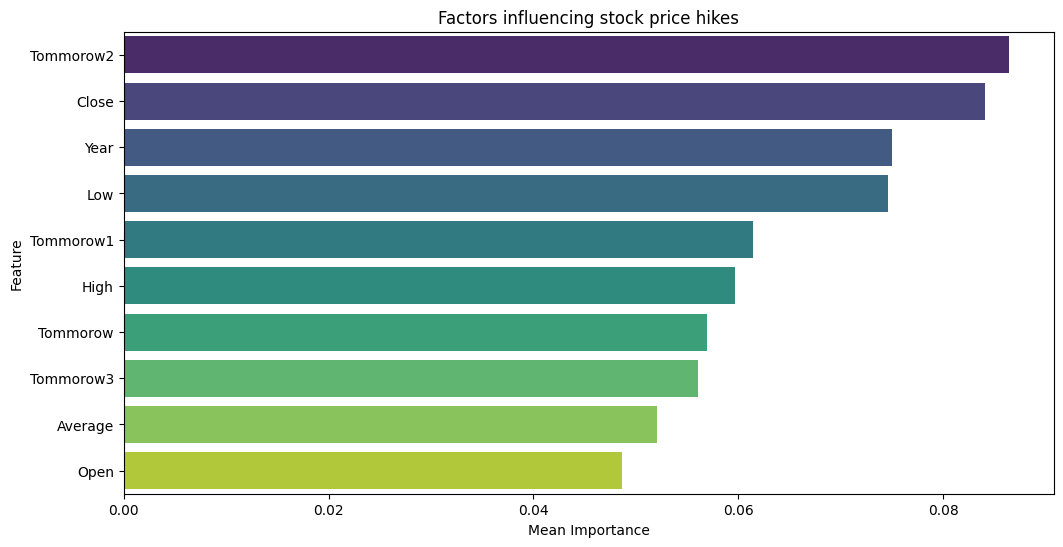

In [34]:
from xgboost import plot_importance


# Create second class with tuned parameters. 
class XBoostTuned:
    def __init__(self, data):
        self.data = data
        self.split_data()
        self.train_baseline()
    
    # Split the data.
    def split_data(self):
        train_size = int(len(self.data) * 0.8)
        self.train = self.data.iloc[:train_size]
        self.test = self.data.iloc[train_size:]
        #Train the model
    def train_baseline(self):
        target = ['Target','Target1','Target2','Target3']
        self.model = MultiOutputClassifier(XGBClassifier(learning_rate=0.2, n_estimators=300, max_depth=4))
        
        # Train the best model
        self.model.fit(self.train.drop(columns=target), self.train[target])
        
    def predict_classes(self):
        target = ['Target','Target1','Target2','Target3'] 
        probs = self.model.predict(self.test.drop(columns=target))
        return probs 
    # Evaluate the model.
    def evaluate(self):
        target = ['Target','Target1','Target2','Target3']
        probs = self.predict_classes()
        actual = self.test[target] 
        acc = classification_report(actual, probs)
        return acc 
    #Plot the feature importances.
    def plot_feature_importance(self):
        feature_importances = []
        feature_names = self.train.drop(columns=['Target', 'Target1', 'Target2', 'Target3']).columns
        
        for estimator in self.model.estimators_:
            feature_importances.append(estimator.feature_importances_)

        importance_df = pd.DataFrame(feature_importances, columns=feature_names)
        mean_importance = importance_df.mean().sort_values(ascending=False)[:10]

        plt.figure(figsize=(12, 6))
        sns.barplot(x=mean_importance.values, y=mean_importance.index, palette="viridis")
        plt.title('Factors influencing stock price hikes')
        plt.xlabel('Mean Importance')
        plt.ylabel('Feature')
        plt.show()


# Example usage:
boost_model = XBoostTuned(df_stocks)
# boost_model.date_convert()
boost_model.split_data()
boost_model.train_baseline()
accuracy = boost_model.evaluate()
print(accuracy)
boost_model.plot_feature_importance()



The XGboost model perform  even better than all the other models with the applied parameters obtained from the GridSearchCV. A plot of feature importance clearly shows how lagged features or prices contribute heavily to the movement of stocks **(Tomorrow's price)**. The XGBoost model outperformed all other models in our analysis, demonstrating superior predictive capabilities when it comes to forecasting stock movements. One notable aspect of its performance is its ability to effectively leverage market indicators, as evidenced by its impressive accuracy. It has an F1 score of about 73% in predicting the direction of stocks movement. 

The F1 Score was used as our metric because it balances between the precision and recall in ensuring false positives and negatives are minimized. A False negative would mean a certain price is meant to increase but the model predicts that it will not, potentially resulting in missed investment opportunities. Conversely, a false positive occurs when the model predicts an increase in price where there isn't one, leading to potentially misguided investment decisions. Therefore, the F1 Score, by considering both precision and recall, provides a comprehensive evaluation of the model's performance, helping to strike a balance between these competing concerns and ultimately improving the reliability of investment decision-making.

One key insight revealed by the model's feature importance plot is the significant contribution of lagged features or prices to the movement of stocks. These lagged features capture historical data points and trends, providing valuable context for understanding and predicting future stock movements.

XGBoost model success shows the importance of incorporating market indicators into predictive models for stock forecasting. By leveraging historical data and market signals, investors can gain valuable insights into potential stock movements and make more informed investment decisions.

## <div style="padding: 20px;color:white;margin:10;font-size:90%;text-align:left;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://w0.peakpx.com/wallpaper/957/661/HD-wallpaper-white-marble-white-stone-texture-marble-stone-background-white-stone.jpg)"><b><span style='color:black'> Conclusion</span></b> </div>

*	For Risk Management: Investors should incorporate volatility and abnormal volume insights into their risk assessment and management strategies, considering the potential for significant price movements.
*	Dividend Considerations: The fluctuating nature of dividends suggests a need for investors to stay informed on EABL's financial health and strategic decisions impacting payouts.
*	Market Indicator Sensitivity: The stronger negative correlations with unemployment and economic means suggest that these factors should be closely monitored, as they significantly influence stock performance.
*  Investment Strategy: Based on the identified trends, investors might benefit from a long-term perspective, especially considering the predictive value of past stock prices indicated by autocorrelation analysis.
* The XGBoost model performs better than all the other models with an F! score of about 73% and is more suitable in predicting probabilities of the **Close, High, Low and Open** direction or movement(Increasing or not)
* The movement of stock prices is heavily influenced by:
1. Tomorrow's price(Lagged feature achived by shifting) 
2. The closing price. 
3. The lowest price.
4. The High  prices.